In [1]:
!nvidia-smi
!pip install xgboost==2.0.3 optuna imbalanced-learn shap joblib openpyxl --quiet

Sun Dec  7 17:43:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install -U imbalanced-learn
!pip install --upgrade pip setuptools wheel
!pip install --upgrade scikit-learn imbalanced-learn optuna joblib matplotlib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 81.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 85.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.5 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matp

In [2]:
!pip install numpy==1.26.4 --force-reinstall
!pip install shap --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 114.8 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 193.6 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import(
precision_recall_curve , recall_score , f1_score , balanced_accuracy_score ,
roc_auc_score , confusion_matrix , precision_score , classification_report ,
matthews_corrcoef , cohen_kappa_score
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import geometric_mean_score , classification_report_imbalanced
import joblib
import optuna
from optuna.samplers import TPESampler

# ==============================================================================
# CONFIGURATION
# ==============================================================================
MODE = "realistic"       # "realistic" drops CA/PA, "full" keeps them
SEED = 67
TEST_SIZE = 0.15
VAL_SIZE = 0.15
FILE_PATH = "/content/final_dataset_p90_success.xlsx"
N_TRIALS = 100


# ==============================================================================
# Load and transform data
# ==============================================================================
print("Reading file...")
df = pd.read_excel(FILE_PATH)
print(f"Dataset: {df.shape[0]:,} rows, {df.shape[1]} cols")
print(f"Success rate: {df['success_label'].mean()*100:.2f}%")


# drop irrelevant/leak columns
drop_cols = [
    'UID', 'Name', 'Club', 'Source_File',
    'UID_k1', 'UID_k2', 'UID_k3',
    'Transfer Value_k1', 'Transfer Value_k2', 'Transfer Value_k3',
    'success_k1', 'success_k2', 'success_k3',
    'Transfer Value',
    'Position', 'Nat'
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# drop CA/PA if realistic
if MODE == "realistic":
    df = df.drop(columns=[c for c in ["CA", "PA"] if c in df.columns], errors='ignore')
    print("MODE=realistic -> Dropped CA and PA")
else:
    print("MODE=full -> Keeping CA and PA")

# feature engineering (if full mode)
if all(col in df.columns for col in ["PA", "CA"]):
    df["Growth_Ratio"] = df["PA"] / df["CA"].replace(0, 1)
    df["Growth_Room"] = df["PA"] - df["CA"]

if 'Age' in df.columns:
    df['Age_Group_Young'] = (df['Age'] <= 20).astype(int)
    df['Age_Group_Peak'] = ((df['Age'] > 20) & (df['Age'] <= 23)).astype(int)

X = df.drop(columns=["success_label"])
y = df["success_label"]
print(f"\nFeatures: {X.shape[1]}  |  Samples: {X.shape[0]:,}")
print(f"Success distribution: {y.value_counts().to_dict()}")

# Split Train / Temp (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=VAL_SIZE + TEST_SIZE, stratify=y, random_state=SEED)
# Split Validation / Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=SEED)


# ==============================================================================
# OPTUNA OBJECTIVE FUNCTION
# ==============================================================================
def objective(trial):
    # SMOTE parameters
    smote_level = trial.suggest_categorical("smote_level", ["small", "medium", "high"])
    smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[smote_level]
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=SEED)

    # XGBoost parameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "tree_method": "gpu_hist",  # Use GPU in Colab
        "random_state": SEED,
        "eval_metric": "logloss"
    }

    clf = XGBClassifier(**params, use_label_encoder=False)

    pipe = ImbPipeline([
        ("smote", smote),
        ("clf", clf)
    ])

    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    return balanced_accuracy_score(y_val, y_val_pred)

# ==============================================================================
# RUN OPTUNA STUDY
# ==============================================================================
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=SEED), study_name="XGBoost_Realistic")
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)

best_params = study.best_params
print("\nBest Hyperparameters:", best_params)

# ==============================================================================
# FINAL MODEL TRAINING
# ==============================================================================
best_params_xgb = study.best_params
smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[best_params_xgb['smote_level']]
best_smote_xgb= SMOTE(sampling_strategy=smote_ratio, random_state=SEED)


xgb_clf = XGBClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    colsample_bytree=best_params["colsample_bytree"],
    gamma=best_params["gamma"],
    reg_lambda=best_params["reg_lambda"],
    reg_alpha=best_params["reg_alpha"],
    tree_method="gpu_hist",  # GPU acceleration
    random_state=SEED,
    use_label_encoder=False,
    eval_metric="logloss"
)

final_pipe_xgb = ImbPipeline([
    ("smote", best_smote_xgb),
    ("clf", xgb_clf)
])

final_pipe_xgb.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Reading file...


[I 2025-12-07 17:44:36,839] A new study created in memory with name: XGBoost_Realistic


Dataset: 43,903 rows, 82 cols
Success rate: 3.29%
MODE=realistic -> Dropped CA and PA

Features: 65  |  Samples: 43,903
Success distribution: {0: 42460, 1: 1443}


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:37] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


[I 2025-12-07 17:44:37,907] Trial 0 finished with value: 0.7946346016294203 and parameters: {'smote_level': 'medium', 'n_estimators': 232, 'max_depth': 3, 'learning_rate': 0.0372030992310257, 'subsample': 0.6852599434737423, 'colsample_bytree': 0.9730026600325441, 'gamma': 3.6140914942793105, 'reg_lambda': 0.124105381329643, 'reg_alpha': 4.106554246922489}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:38,618] Trial 1 finished with value: 0.7426968301320633 and parameters: {'smote_level': 'small', 'n_estimators': 175, 'max_depth': 5, 'learning_rate': 0.02398715961802208, 'subsample': 0.6044456461293007, 'colsample_bytree': 0.7638354039473789, 'gamma': 2.061272257629838, 'reg_lambda': 0.12200497542695123, 'reg_alpha': 4.775043967143612}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:39,581] Trial 2 finished with value: 0.7348103225693899 and parameters: {'smote_level': 'medium', 'n_estimators': 223, 'max_depth': 7, 'learning_rate': 0.11130236949854995, 'subsample': 0.9813698212790307, 'colsample_bytree': 0.8407699229007761, 'gamma': 2.011257849732101, 'reg_lambda': 0.5126965547823584, 'reg_alpha': 4.070817451529237}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:41,219] Trial 3 finished with value: 0.7315534446363462 and parameters: {'smote_level': 'high', 'n_estimators': 173, 'max_depth': 8, 'learning_rate': 0.12108336578262786, 'subsample': 0.6184559914235704, 'colsample_bytree': 0.9878345575091758, 'gamma': 1.8527177160030517, 'reg_lambda': 2.593513273531763, 'reg_alpha': 1.369653507991646}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:42,230] Trial 4 finished with value: 0.723509926553968 and parameters: {'smote_level': 'medium', 'n_estimators': 491, 'max_depth': 3, 'learning_rate': 0.20952859869129206, 'subsample': 0.7416816720920439, 'colsample_bytree': 0.9708141342722716, 'gamma': 2.002438338561486, 'reg_lambda': 0.8647735161772228, 'reg_alpha': 2.2372360543881724}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:43,393] Trial 5 finished with value: 0.7280632316254079 and parameters: {'smote_level': 'small', 'n_estimators': 371, 'max_depth': 6, 'learning_rate': 0.021500171213086904, 'subsample': 0.6607342165872642, 'colsample_bytree': 0.7814207517983819, 'gamma': 4.109489402713902, 'reg_lambda': 1.8875378029848822, 'reg_alpha': 4.985826798679207}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:44,485] Trial 6 finished with value: 0.6644663386891366 and parameters: {'smote_level': 'small', 'n_estimators': 376, 'max_depth': 5, 'learning_rate': 0.13720466600024972, 'subsample': 0.6750707006976931, 'colsample_bytree': 0.785602332749154, 'gamma': 0.06206772379572234, 'reg_lambda': 0.20563069135604445, 'reg_alpha': 0.8424929655394603}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:45,405] Trial 7 finished with value: 0.7331235498333945 and parameters: {'smote_level': 'medium', 'n_estimators': 243, 'max_depth': 9, 'learning_rate': 0.14908924043977712, 'subsample': 0.6588957406814445, 'colsample_bytree': 0.6952278886083997, 'gamma': 2.3284030773147784, 'reg_lambda': 7.933761202724934, 'reg_alpha': 2.634537739131204}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:46,201] Trial 8 finished with value: 0.713586643638457 and parameters: {'smote_level': 'small', 'n_estimators': 108, 'max_depth': 8, 'learning_rate': 0.022055410388994137, 'subsample': 0.9175466294277452, 'colsample_bytree': 0.7322446953048619, 'gamma': 0.13480886279005622, 'reg_lambda': 8.513656174066792, 'reg_alpha': 4.739645974595556}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:47,148] Trial 9 finished with value: 0.7134296331187523 and parameters: {'smote_level': 'small', 'n_estimators': 422, 'max_depth': 6, 'learning_rate': 0.11238031518425252, 'subsample': 0.7157759383328506, 'colsample_bytree': 0.6384542062025221, 'gamma': 3.3358902069016265, 'reg_lambda': 6.775262630486915, 'reg_alpha': 0.5728747228781511}. Best is trial 0 with value: 0.7946346016294203.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:48,146] Trial 10 finished with value: 0.8398928839343347 and parameters: {'smote_level': 'high', 'n_estimators': 305, 'max_depth': 3, 'learning_rate': 0.010609701321034655, 'subsample': 0.8278331261396423, 'colsample_bytree': 0.8867949149635789, 'gamma': 4.7541639252868, 'reg_lambda': 0.2869426729039935, 'reg_alpha': 3.278653693654581}. Best is trial 10 with value: 0.8398928839343347.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:49,136] Trial 11 finished with value: 0.840520926013154 and parameters: {'smote_level': 'high', 'n_estimators': 293, 'max_depth': 3, 'learning_rate': 0.01162677499306044, 'subsample': 0.8528284447230342, 'colsample_bytree': 0.891459679846103, 'gamma': 4.794423884250189, 'reg_lambda': 0.26880407843264764, 'reg_alpha': 3.420271901523221}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:50,265] Trial 12 finished with value: 0.836366689345964 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.010545830746577164, 'subsample': 0.8444982941613374, 'colsample_bytree': 0.8808917331804552, 'gamma': 4.925601505244534, 'reg_lambda': 0.328702149698388, 'reg_alpha': 2.9848054368967127}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:51,345] Trial 13 finished with value: 0.8396573681547774 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 3, 'learning_rate': 0.010443842606790746, 'subsample': 0.8209152894253653, 'colsample_bytree': 0.8944070537910779, 'gamma': 4.9166121200127435, 'reg_lambda': 0.3983220161394802, 'reg_alpha': 3.27552734489606}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:53,076] Trial 14 finished with value: 0.8361355349697319 and parameters: {'smote_level': 'high', 'n_estimators': 346, 'max_depth': 4, 'learning_rate': 0.014457286637432398, 'subsample': 0.8926052691099953, 'colsample_bytree': 0.9144453604019501, 'gamma': 4.205509988238366, 'reg_lambda': 0.8994666824201234, 'reg_alpha': 3.64947959239415}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:54,231] Trial 15 finished with value: 0.7918890982362485 and parameters: {'smote_level': 'high', 'n_estimators': 283, 'max_depth': 4, 'learning_rate': 0.05961431086750642, 'subsample': 0.7668461670522422, 'colsample_bytree': 0.8463057031795832, 'gamma': 2.9463021150597815, 'reg_lambda': 0.2609658579864062, 'reg_alpha': 2.050892058893104}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:55,710] Trial 16 finished with value: 0.7525012648069642 and parameters: {'smote_level': 'high', 'n_estimators': 446, 'max_depth': 5, 'learning_rate': 0.05210211019257708, 'subsample': 0.8704972823983053, 'colsample_bytree': 0.9305632063711164, 'gamma': 4.296308102269734, 'reg_lambda': 0.6161041230776491, 'reg_alpha': 1.649621231408506}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:58,262] Trial 17 finished with value: 0.7907518623192198 and parameters: {'smote_level': 'high', 'n_estimators': 269, 'max_depth': 10, 'learning_rate': 0.013822443662834994, 'subsample': 0.7933606479945696, 'colsample_bytree': 0.8388077427833204, 'gamma': 1.0455497076765812, 'reg_lambda': 0.18068869554933145, 'reg_alpha': 3.6936273535446853}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:44:59,372] Trial 18 finished with value: 0.8177380453934857 and parameters: {'smote_level': 'high', 'n_estimators': 345, 'max_depth': 3, 'learning_rate': 0.03331326363288552, 'subsample': 0.9308596678618336, 'colsample_bytree': 0.9408079095610176, 'gamma': 4.526112680235237, 'reg_lambda': 1.473972686599706, 'reg_alpha': 2.7653049515644357}. Best is trial 11 with value: 0.840520926013154.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:44:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:00,174] Trial 19 finished with value: 0.8412274733518257 and parameters: {'smote_level': 'high', 'n_estimators': 146, 'max_depth': 4, 'learning_rate': 0.0161840489309169, 'subsample': 0.994744116404003, 'colsample_bytree': 0.8315082680637417, 'gamma': 3.6822248296676836, 'reg_lambda': 0.10851308326978835, 'reg_alpha': 3.4382094208278016}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:00,906] Trial 20 finished with value: 0.8405972505713438 and parameters: {'smote_level': 'high', 'n_estimators': 112, 'max_depth': 4, 'learning_rate': 0.014536885395239252, 'subsample': 0.986143526466136, 'colsample_bytree': 0.812460321382876, 'gamma': 3.8381113048236086, 'reg_lambda': 0.16078313069272832, 'reg_alpha': 4.331205694630482}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:01,624] Trial 21 finished with value: 0.8362816419811239 and parameters: {'smote_level': 'high', 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.015841369041118252, 'subsample': 0.9979922393575948, 'colsample_bytree': 0.8192301280702752, 'gamma': 3.661877746614303, 'reg_lambda': 0.10333950920422423, 'reg_alpha': 4.259346135116554}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:02,470] Trial 22 finished with value: 0.8303643080197485 and parameters: {'smote_level': 'high', 'n_estimators': 141, 'max_depth': 5, 'learning_rate': 0.017006901799272032, 'subsample': 0.9653592170608299, 'colsample_bytree': 0.7306194122633092, 'gamma': 2.943106629312888, 'reg_lambda': 0.1829581886267437, 'reg_alpha': 3.6537786762850573}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:03,351] Trial 23 finished with value: 0.8163249507161424 and parameters: {'smote_level': 'high', 'n_estimators': 185, 'max_depth': 4, 'learning_rate': 0.0362527372890199, 'subsample': 0.9494882179799021, 'colsample_bytree': 0.8682944674523638, 'gamma': 3.915490761324742, 'reg_lambda': 0.1551722601185136, 'reg_alpha': 4.313086988511398}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:04,547] Trial 24 finished with value: 0.8157754138971756 and parameters: {'smote_level': 'high', 'n_estimators': 136, 'max_depth': 6, 'learning_rate': 0.02673158877524837, 'subsample': 0.8978090988482612, 'colsample_bytree': 0.811087032848403, 'gamma': 3.254435473877459, 'reg_lambda': 0.10197806656751432, 'reg_alpha': 3.2085383842734947}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:05,751] Trial 25 finished with value: 0.8191914830515867 and parameters: {'smote_level': 'high', 'n_estimators': 142, 'max_depth': 4, 'learning_rate': 0.061880239844879496, 'subsample': 0.9986146371536049, 'colsample_bytree': 0.7492767089301559, 'gamma': 3.8079213434224775, 'reg_lambda': 0.24588211432620438, 'reg_alpha': 3.8710649726667237}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:06,765] Trial 26 finished with value: 0.8314274000802498 and parameters: {'smote_level': 'high', 'n_estimators': 204, 'max_depth': 5, 'learning_rate': 0.01868165102357347, 'subsample': 0.9604635580582848, 'colsample_bytree': 0.688950709277659, 'gamma': 4.491678236675918, 'reg_lambda': 0.42442373399762423, 'reg_alpha': 4.398199989493876}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:07,533] Trial 27 finished with value: 0.8393389857120428 and parameters: {'smote_level': 'high', 'n_estimators': 152, 'max_depth': 3, 'learning_rate': 0.012392521774799645, 'subsample': 0.8597910875234959, 'colsample_bytree': 0.8572141104311537, 'gamma': 2.994177836299842, 'reg_lambda': 0.14378025776787104, 'reg_alpha': 3.4570527138543743}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:08,323] Trial 28 finished with value: 0.7919294412170059 and parameters: {'smote_level': 'medium', 'n_estimators': 118, 'max_depth': 7, 'learning_rate': 0.030550892040764638, 'subsample': 0.9340698258847557, 'colsample_bytree': 0.8106485897878134, 'gamma': 2.6422669170391666, 'reg_lambda': 3.545766317706901, 'reg_alpha': 2.941535482577794}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:09,231] Trial 29 finished with value: 0.8361693358455016 and parameters: {'smote_level': 'high', 'n_estimators': 251, 'max_depth': 3, 'learning_rate': 0.018636282212906773, 'subsample': 0.886646613359711, 'colsample_bytree': 0.9536786090649537, 'gamma': 3.4417650946505987, 'reg_lambda': 0.7017838191562322, 'reg_alpha': 2.411878899661489}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:10,003] Trial 30 finished with value: 0.7751380384152404 and parameters: {'smote_level': 'medium', 'n_estimators': 218, 'max_depth': 4, 'learning_rate': 0.047606209433541984, 'subsample': 0.7898550425508425, 'colsample_bytree': 0.9130043843196572, 'gamma': 3.9173077153762406, 'reg_lambda': 0.1376718885669772, 'reg_alpha': 4.030939229886612}. Best is trial 19 with value: 0.8412274733518257.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:11,077] Trial 31 finished with value: 0.8428379215296313 and parameters: {'smote_level': 'high', 'n_estimators': 339, 'max_depth': 3, 'learning_rate': 0.011937634050631345, 'subsample': 0.8227510246254631, 'colsample_bytree': 0.8863276653598512, 'gamma': 4.705310960204483, 'reg_lambda': 0.28757890321474744, 'reg_alpha': 3.3581900482147113}. Best is trial 31 with value: 0.8428379215296313.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:12,196] Trial 32 finished with value: 0.8351891104481779 and parameters: {'smote_level': 'high', 'n_estimators': 362, 'max_depth': 3, 'learning_rate': 0.013346886286873857, 'subsample': 0.9174745799171142, 'colsample_bytree': 0.9059075875574408, 'gamma': 4.5898185850151085, 'reg_lambda': 0.21813898637071155, 'reg_alpha': 4.577742029817577}. Best is trial 31 with value: 0.8428379215296313.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:13,496] Trial 33 finished with value: 0.830877863261283 and parameters: {'smote_level': 'high', 'n_estimators': 401, 'max_depth': 4, 'learning_rate': 0.012405707330090084, 'subsample': 0.818489619597282, 'colsample_bytree': 0.8343838397425762, 'gamma': 4.404827569150107, 'reg_lambda': 0.36096745375064326, 'reg_alpha': 3.92436438606055}. Best is trial 31 with value: 0.8428379215296313.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:14,424] Trial 34 finished with value: 0.8145978349993894 and parameters: {'smote_level': 'high', 'n_estimators': 170, 'max_depth': 5, 'learning_rate': 0.025908553658891657, 'subsample': 0.9757360138957198, 'colsample_bytree': 0.8684102143177974, 'gamma': 4.849197872565496, 'reg_lambda': 0.1310803708397553, 'reg_alpha': 3.010919147170484}. Best is trial 31 with value: 0.8428379215296313.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:15,263] Trial 35 finished with value: 0.8456619301826556 and parameters: {'smote_level': 'high', 'n_estimators': 199, 'max_depth': 3, 'learning_rate': 0.01926097855653975, 'subsample': 0.7568758321727823, 'colsample_bytree': 0.7801724956099482, 'gamma': 3.988243663486723, 'reg_lambda': 0.437465675729569, 'reg_alpha': 3.412035622845022}. Best is trial 35 with value: 0.8456619301826556.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:15,909] Trial 36 finished with value: 0.721432808220373 and parameters: {'smote_level': 'small', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2965125729043501, 'subsample': 0.7213867378356972, 'colsample_bytree': 0.7796257280483343, 'gamma': 3.5898992290862988, 'reg_lambda': 0.5245850669602106, 'reg_alpha': 1.8392695410792306}. Best is trial 35 with value: 0.8456619301826556.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:16,926] Trial 37 finished with value: 0.7896549693829487 and parameters: {'smote_level': 'medium', 'n_estimators': 168, 'max_depth': 5, 'learning_rate': 0.0436203788769541, 'subsample': 0.7614390572912582, 'colsample_bytree': 0.7577654606915415, 'gamma': 4.074048607071978, 'reg_lambda': 1.26533796532636, 'reg_alpha': 4.1277576008738635}. Best is trial 35 with value: 0.8456619301826556.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:18,514] Trial 38 finished with value: 0.8402875909352594 and parameters: {'smote_level': 'high', 'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.020838287845952676, 'subsample': 0.7015060946545564, 'colsample_bytree': 0.7992363454271008, 'gamma': 1.3450166386854545, 'reg_lambda': 0.4796315427364845, 'reg_alpha': 4.991895659325479}. Best is trial 35 with value: 0.8456619301826556.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:19,187] Trial 39 finished with value: 0.7436770555293871 and parameters: {'smote_level': 'small', 'n_estimators': 161, 'max_depth': 3, 'learning_rate': 0.07204750460051335, 'subsample': 0.614603658509388, 'colsample_bytree': 0.7873955212558922, 'gamma': 2.605540699312343, 'reg_lambda': 0.17696662064132157, 'reg_alpha': 2.5892320600142242}. Best is trial 35 with value: 0.8456619301826556.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:20,218] Trial 40 finished with value: 0.7965972331257305 and parameters: {'smote_level': 'medium', 'n_estimators': 221, 'max_depth': 6, 'learning_rate': 0.015882386382459267, 'subsample': 0.7568277688577818, 'colsample_bytree': 0.7058458631158707, 'gamma': 3.1797549996044396, 'reg_lambda': 0.11399031059891096, 'reg_alpha': 0.13575563408397118}. Best is trial 35 with value: 0.8456619301826556.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:21,276] Trial 41 finished with value: 0.8467610038205893 and parameters: {'smote_level': 'high', 'n_estimators': 332, 'max_depth': 3, 'learning_rate': 0.012358826786781732, 'subsample': 0.7890736685841573, 'colsample_bytree': 0.8319814122863152, 'gamma': 4.2021981184709984, 'reg_lambda': 0.2735128780404188, 'reg_alpha': 3.459935900737426}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:22,369] Trial 42 finished with value: 0.8349961183510406 and parameters: {'smote_level': 'high', 'n_estimators': 342, 'max_depth': 3, 'learning_rate': 0.01847426297863303, 'subsample': 0.7791161014611081, 'colsample_bytree': 0.8283164157740215, 'gamma': 4.179072093616664, 'reg_lambda': 0.1962973781831013, 'reg_alpha': 3.773385579016448}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:23,419] Trial 43 finished with value: 0.8100467106296122 and parameters: {'smote_level': 'high', 'n_estimators': 265, 'max_depth': 4, 'learning_rate': 0.02281081686774234, 'subsample': 0.7406399773135354, 'colsample_bytree': 0.8556348736396426, 'gamma': 3.67445976603163, 'reg_lambda': 0.3224610620371669, 'reg_alpha': 3.4912546780255136}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:24,457] Trial 44 finished with value: 0.8071507388217233 and parameters: {'smote_level': 'high', 'n_estimators': 324, 'max_depth': 3, 'learning_rate': 0.08520001602983274, 'subsample': 0.637972642732005, 'colsample_bytree': 0.7689064482307304, 'gamma': 4.012530547334574, 'reg_lambda': 0.22874165644945937, 'reg_alpha': 4.6706072977748025}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:25,619] Trial 45 finished with value: 0.8344465815320737 and parameters: {'smote_level': 'high', 'n_estimators': 397, 'max_depth': 3, 'learning_rate': 0.014956999194982315, 'subsample': 0.7332990343281796, 'colsample_bytree': 0.8003375544819555, 'gamma': 3.4836818933321156, 'reg_lambda': 0.3103538407134741, 'reg_alpha': 2.3247505866291602}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:26,174] Trial 46 finished with value: 0.6142873030826399 and parameters: {'smote_level': 'small', 'n_estimators': 115, 'max_depth': 4, 'learning_rate': 0.01151119204641177, 'subsample': 0.8085055992543604, 'colsample_bytree': 0.6338421171263784, 'gamma': 4.642680176114045, 'reg_lambda': 0.7672609334036511, 'reg_alpha': 3.1688793701994067}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:27,583] Trial 47 finished with value: 0.8238189319795537 and parameters: {'smote_level': 'high', 'n_estimators': 190, 'max_depth': 8, 'learning_rate': 0.010023615088147206, 'subsample': 0.6945366014343437, 'colsample_bytree': 0.7333504700005494, 'gamma': 3.8231027257974555, 'reg_lambda': 0.14743199614847408, 'reg_alpha': 2.8506308850635893}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:29,121] Trial 48 finished with value: 0.8185252786936725 and parameters: {'smote_level': 'high', 'n_estimators': 321, 'max_depth': 5, 'learning_rate': 0.02023881491627447, 'subsample': 0.8344844919152983, 'colsample_bytree': 0.8700444282198071, 'gamma': 4.319700091715617, 'reg_lambda': 0.4945440703920317, 'reg_alpha': 4.405556551075611}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:30,717] Trial 49 finished with value: 0.8188371190314195 and parameters: {'smote_level': 'high', 'n_estimators': 381, 'max_depth': 3, 'learning_rate': 0.029770208693815622, 'subsample': 0.6694509603981738, 'colsample_bytree': 0.8246585039818486, 'gamma': 4.992638838620168, 'reg_lambda': 0.39834397553499695, 'reg_alpha': 3.5170441171776736}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:32,172] Trial 50 finished with value: 0.8131084157638562 and parameters: {'smote_level': 'high', 'n_estimators': 495, 'max_depth': 4, 'learning_rate': 0.014492037785184141, 'subsample': 0.9851430578986231, 'colsample_bytree': 0.9867246188659446, 'gamma': 2.254052634565351, 'reg_lambda': 0.255103817621149, 'reg_alpha': 2.7055395746580913}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:33,199] Trial 51 finished with value: 0.838793810296401 and parameters: {'smote_level': 'high', 'n_estimators': 282, 'max_depth': 3, 'learning_rate': 0.011327945413947457, 'subsample': 0.8474182950526219, 'colsample_bytree': 0.900119808320162, 'gamma': 4.806784743425981, 'reg_lambda': 0.2630505201843928, 'reg_alpha': 3.397480039087056}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:34,117] Trial 52 finished with value: 0.8381657682175816 and parameters: {'smote_level': 'high', 'n_estimators': 241, 'max_depth': 3, 'learning_rate': 0.012615953200504596, 'subsample': 0.8048327548079087, 'colsample_bytree': 0.882557305291222, 'gamma': 4.685173870594467, 'reg_lambda': 0.590131027123609, 'reg_alpha': 3.1815353230550647}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:35,403] Trial 53 finished with value: 0.8326834842378884 and parameters: {'smote_level': 'high', 'n_estimators': 466, 'max_depth': 3, 'learning_rate': 0.017244113715200765, 'subsample': 0.7779528768922652, 'colsample_bytree': 0.8493336403117417, 'gamma': 4.288435121923569, 'reg_lambda': 0.17272611819811093, 'reg_alpha': 3.9921788794192365}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:36,481] Trial 54 finished with value: 0.8324839500357635 and parameters: {'smote_level': 'high', 'n_estimators': 289, 'max_depth': 4, 'learning_rate': 0.013681249095615933, 'subsample': 0.8685296143910771, 'colsample_bytree': 0.9305735558870172, 'gamma': 4.115505087133678, 'reg_lambda': 0.11898165505146008, 'reg_alpha': 3.0250865328614593}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:37,607] Trial 55 finished with value: 0.8453097468641511 and parameters: {'smote_level': 'high', 'n_estimators': 358, 'max_depth': 3, 'learning_rate': 0.01158881282540904, 'subsample': 0.7496856264038827, 'colsample_bytree': 0.7988404441832796, 'gamma': 4.476455331657021, 'reg_lambda': 0.21869201842284394, 'reg_alpha': 3.652706438329223}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:38,468] Trial 56 finished with value: 0.7250800317510162 and parameters: {'smote_level': 'small', 'n_estimators': 362, 'max_depth': 3, 'learning_rate': 0.010089947897818636, 'subsample': 0.7507523936316693, 'colsample_bytree': 0.7711109065802525, 'gamma': 3.739031954944201, 'reg_lambda': 0.21911095685322787, 'reg_alpha': 4.176251521566899}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:40,684] Trial 57 finished with value: 0.7878493484063432 and parameters: {'smote_level': 'high', 'n_estimators': 332, 'max_depth': 9, 'learning_rate': 0.016480990834175542, 'subsample': 0.7190673284146741, 'colsample_bytree': 0.7996435498419149, 'gamma': 4.523064365794735, 'reg_lambda': 0.16209239177593596, 'reg_alpha': 3.677238343484512}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:43,199] Trial 58 finished with value: 0.8392735646621656 and parameters: {'smote_level': 'high', 'n_estimators': 388, 'max_depth': 4, 'learning_rate': 0.012000138690245294, 'subsample': 0.7695003058237171, 'colsample_bytree': 0.7455486891276694, 'gamma': 0.4659080122355177, 'reg_lambda': 0.34760888961518327, 'reg_alpha': 4.519184854569237}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:44,513] Trial 59 finished with value: 0.8177402260951484 and parameters: {'smote_level': 'high', 'n_estimators': 413, 'max_depth': 4, 'learning_rate': 0.022502837048850755, 'subsample': 0.9478193368916996, 'colsample_bytree': 0.8131321656645458, 'gamma': 4.383645218159742, 'reg_lambda': 2.6308863115651517, 'reg_alpha': 1.027269684127826}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:45,438] Trial 60 finished with value: 0.8065586783203365 and parameters: {'smote_level': 'medium', 'n_estimators': 361, 'max_depth': 3, 'learning_rate': 0.014199494547577378, 'subsample': 0.7335244689236804, 'colsample_bytree': 0.7903473064162102, 'gamma': 3.96998829481519, 'reg_lambda': 0.19675405966460693, 'reg_alpha': 3.786831826838455}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:46,488] Trial 61 finished with value: 0.8424835575094642 and parameters: {'smote_level': 'high', 'n_estimators': 318, 'max_depth': 3, 'learning_rate': 0.011342254332748424, 'subsample': 0.7802658372898881, 'colsample_bytree': 0.8888531255622723, 'gamma': 4.686846101499248, 'reg_lambda': 0.2802554419723004, 'reg_alpha': 3.3273275698875127}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:47,523] Trial 62 finished with value: 0.8412274733518257 and parameters: {'smote_level': 'high', 'n_estimators': 307, 'max_depth': 3, 'learning_rate': 0.011096986583316714, 'subsample': 0.7854260841338828, 'colsample_bytree': 0.8389449158545902, 'gamma': 4.697373271994514, 'reg_lambda': 0.29829945760416976, 'reg_alpha': 3.3283123586625645}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:48,568] Trial 63 finished with value: 0.8410704628321208 and parameters: {'smote_level': 'high', 'n_estimators': 304, 'max_depth': 3, 'learning_rate': 0.011349223624822066, 'subsample': 0.7802392448791974, 'colsample_bytree': 0.8396764934064653, 'gamma': 4.729168002119941, 'reg_lambda': 0.29986909779663756, 'reg_alpha': 3.3447517166399727}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:49,608] Trial 64 finished with value: 0.8419340206904973 and parameters: {'smote_level': 'high', 'n_estimators': 316, 'max_depth': 3, 'learning_rate': 0.011007552658677713, 'subsample': 0.7984888250875403, 'colsample_bytree': 0.8610810464938056, 'gamma': 4.4491166062264895, 'reg_lambda': 1.0842446664421714, 'reg_alpha': 3.5851853223771832}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:50,643] Trial 65 finished with value: 0.8453882521240034 and parameters: {'smote_level': 'high', 'n_estimators': 320, 'max_depth': 3, 'learning_rate': 0.012908552700275293, 'subsample': 0.7977659261006564, 'colsample_bytree': 0.8900774427810874, 'gamma': 4.447182883259182, 'reg_lambda': 1.1022709779899837, 'reg_alpha': 3.5727718745677937}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:51,719] Trial 66 finished with value: 0.836678529683711 and parameters: {'smote_level': 'high', 'n_estimators': 336, 'max_depth': 3, 'learning_rate': 0.013033039967846043, 'subsample': 0.800300595983182, 'colsample_bytree': 0.8814101700764917, 'gamma': 4.191087841698485, 'reg_lambda': 1.208294923851861, 'reg_alpha': 3.1059388424161494}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:52,774] Trial 67 finished with value: 0.8405994312730064 and parameters: {'smote_level': 'high', 'n_estimators': 318, 'max_depth': 3, 'learning_rate': 0.010471614993359872, 'subsample': 0.8285571600355961, 'colsample_bytree': 0.917321433899645, 'gamma': 4.450170249889709, 'reg_lambda': 1.7864005069554694, 'reg_alpha': 2.8469283992899315}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:54,140] Trial 68 finished with value: 0.8432282671272309 and parameters: {'smote_level': 'high', 'n_estimators': 271, 'max_depth': 3, 'learning_rate': 0.012923939792696137, 'subsample': 0.8157774345372031, 'colsample_bytree': 0.8673024088499643, 'gamma': 4.860551988338343, 'reg_lambda': 0.8595050824698731, 'reg_alpha': 3.590042786023147}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:55,494] Trial 69 finished with value: 0.8339330262905393 and parameters: {'smote_level': 'high', 'n_estimators': 263, 'max_depth': 3, 'learning_rate': 0.017788772056774198, 'subsample': 0.7493443954413289, 'colsample_bytree': 0.9488136279081414, 'gamma': 4.831968619130362, 'reg_lambda': 0.8790975023249744, 'reg_alpha': 3.8398034185982866}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:56,577] Trial 70 finished with value: 0.7581514628146753 and parameters: {'smote_level': 'high', 'n_estimators': 348, 'max_depth': 7, 'learning_rate': 0.17056939613704478, 'subsample': 0.8137517768345427, 'colsample_bytree': 0.896885731375528, 'gamma': 4.942538198739011, 'reg_lambda': 1.613596137610221, 'reg_alpha': 3.571655165722451}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:57,579] Trial 71 finished with value: 0.8385604752185063 and parameters: {'smote_level': 'high', 'n_estimators': 298, 'max_depth': 3, 'learning_rate': 0.012828520940884089, 'subsample': 0.8400865904565942, 'colsample_bytree': 0.8603014701299152, 'gamma': 4.529521024387651, 'reg_lambda': 1.0057614132985422, 'reg_alpha': 3.6138825756622754}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:45:58,688] Trial 72 finished with value: 0.8360145060274594 and parameters: {'smote_level': 'high', 'n_estimators': 353, 'max_depth': 3, 'learning_rate': 0.015747629333041937, 'subsample': 0.7949966619722495, 'colsample_bytree': 0.869911442020829, 'gamma': 4.275100575311359, 'reg_lambda': 1.030235765309085, 'reg_alpha': 3.289804670524025}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:45:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:00,108] Trial 73 finished with value: 0.8398143786744823 and parameters: {'smote_level': 'high', 'n_estimators': 274, 'max_depth': 3, 'learning_rate': 0.012035156218057912, 'subsample': 0.82628421214103, 'colsample_bytree': 0.8902920311139892, 'gamma': 4.635771878729477, 'reg_lambda': 1.2896770674803757, 'reg_alpha': 3.8757186663192313}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:01,668] Trial 74 finished with value: 0.8356197990265348 and parameters: {'smote_level': 'high', 'n_estimators': 330, 'max_depth': 3, 'learning_rate': 0.013762287270548472, 'subsample': 0.7699601009758079, 'colsample_bytree': 0.9248205055373435, 'gamma': 4.4193449295921665, 'reg_lambda': 0.7198555360844566, 'reg_alpha': 4.028658170772792}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:02,791] Trial 75 finished with value: 0.8131465780429511 and parameters: {'smote_level': 'high', 'n_estimators': 315, 'max_depth': 4, 'learning_rate': 0.019845674822368115, 'subsample': 0.8153023779678567, 'colsample_bytree': 0.8496678256899526, 'gamma': 4.863233629045496, 'reg_lambda': 0.4351932236815264, 'reg_alpha': 3.6868755158414914}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:03,519] Trial 76 finished with value: 0.6902411419898467 and parameters: {'smote_level': 'small', 'n_estimators': 256, 'max_depth': 3, 'learning_rate': 0.010997153432115062, 'subsample': 0.8021427684472823, 'colsample_bytree': 0.903605102119305, 'gamma': 4.995029234178584, 'reg_lambda': 0.5867540806905293, 'reg_alpha': 3.499884861259741}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:04,650] Trial 77 finished with value: 0.8355838174491024 and parameters: {'smote_level': 'high', 'n_estimators': 373, 'max_depth': 3, 'learning_rate': 0.015522168733055314, 'subsample': 0.8567178249179681, 'colsample_bytree': 0.8773389992293006, 'gamma': 4.567806520788693, 'reg_lambda': 2.3534797598803814, 'reg_alpha': 4.182733338531465}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:06,897] Trial 78 finished with value: 0.7805930636241517 and parameters: {'smote_level': 'medium', 'n_estimators': 293, 'max_depth': 10, 'learning_rate': 0.0100805042371611, 'subsample': 0.7642594737962222, 'colsample_bytree': 0.8594441749814395, 'gamma': 4.0727213580011785, 'reg_lambda': 1.0626603547296711, 'reg_alpha': 2.9910286150689283}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:08,146] Trial 79 finished with value: 0.8152662200589662 and parameters: {'smote_level': 'high', 'n_estimators': 282, 'max_depth': 4, 'learning_rate': 0.024508255047840745, 'subsample': 0.7889961999816415, 'colsample_bytree': 0.8234980987178543, 'gamma': 4.2163276815513875, 'reg_lambda': 0.8191760419769882, 'reg_alpha': 3.2550912846390365}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:09,222] Trial 80 finished with value: 0.8387196664398737 and parameters: {'smote_level': 'high', 'n_estimators': 356, 'max_depth': 3, 'learning_rate': 0.012833755152104245, 'subsample': 0.7475831807790196, 'colsample_bytree': 0.8766245540538162, 'gamma': 4.738511204487274, 'reg_lambda': 0.37207414606126576, 'reg_alpha': 2.1759231455966916}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:10,299] Trial 81 finished with value: 0.8382104726016644 and parameters: {'smote_level': 'high', 'n_estimators': 339, 'max_depth': 3, 'learning_rate': 0.014476763545167115, 'subsample': 0.7091711428735729, 'colsample_bytree': 0.8451404348848496, 'gamma': 1.8040332689681988, 'reg_lambda': 1.5074269955864383, 'reg_alpha': 3.393609241309858}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:11,257] Trial 82 finished with value: 0.8418217145548752 and parameters: {'smote_level': 'high', 'n_estimators': 233, 'max_depth': 4, 'learning_rate': 0.016591937647745848, 'subsample': 0.7319960354778781, 'colsample_bytree': 0.8327269472365365, 'gamma': 3.9227196076103437, 'reg_lambda': 6.05116565694895, 'reg_alpha': 3.745556380198895}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:12,375] Trial 83 finished with value: 0.8413506829957607 and parameters: {'smote_level': 'high', 'n_estimators': 312, 'max_depth': 4, 'learning_rate': 0.012033968389712253, 'subsample': 0.725995542796447, 'colsample_bytree': 0.862221495563802, 'gamma': 4.370553812356158, 'reg_lambda': 6.421599286851908, 'reg_alpha': 3.582168332773757}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:13,269] Trial 84 finished with value: 0.8389933444985258 and parameters: {'smote_level': 'high', 'n_estimators': 242, 'max_depth': 3, 'learning_rate': 0.017792781192249193, 'subsample': 0.772777458048652, 'colsample_bytree': 0.8925646939508829, 'gamma': 3.895268165501364, 'reg_lambda': 3.711170349243777, 'reg_alpha': 3.9378205662314754}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:14,219] Trial 85 finished with value: 0.8403279339160168 and parameters: {'smote_level': 'high', 'n_estimators': 223, 'max_depth': 4, 'learning_rate': 0.013540755862232724, 'subsample': 0.7381094710162713, 'colsample_bytree': 0.8317725938190319, 'gamma': 4.476654339630057, 'reg_lambda': 9.760166539067907, 'reg_alpha': 3.7971039570677396}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:15,093] Trial 86 finished with value: 0.8371048568587429 and parameters: {'smote_level': 'high', 'n_estimators': 214, 'max_depth': 3, 'learning_rate': 0.010960012745113197, 'subsample': 0.7944966403981337, 'colsample_bytree': 0.9091253476538731, 'gamma': 3.5395323809648818, 'reg_lambda': 0.23372856084085203, 'reg_alpha': 3.121327080440234}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:15,984] Trial 87 finished with value: 0.8436992986863453 and parameters: {'smote_level': 'high', 'n_estimators': 229, 'max_depth': 3, 'learning_rate': 0.015150334330299105, 'subsample': 0.7531589572006754, 'colsample_bytree': 0.8068237046714831, 'gamma': 4.060027269206149, 'reg_lambda': 3.6929383108134504, 'reg_alpha': 3.7365579927262265}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:17,034] Trial 88 finished with value: 0.8327957903735106 and parameters: {'smote_level': 'high', 'n_estimators': 330, 'max_depth': 3, 'learning_rate': 0.0147774699782029, 'subsample': 0.754488739448377, 'colsample_bytree': 0.7809454181399768, 'gamma': 4.136638517510786, 'reg_lambda': 4.237084882026903, 'reg_alpha': 2.5207218506014044}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:17,772] Trial 89 finished with value: 0.7158207724917569 and parameters: {'smote_level': 'small', 'n_estimators': 199, 'max_depth': 3, 'learning_rate': 0.019362589148348458, 'subsample': 0.8214245994341145, 'colsample_bytree': 0.6157644078898303, 'gamma': 4.307315548950077, 'reg_lambda': 2.3151446352623495, 'reg_alpha': 3.4206148970771064}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:18,996] Trial 90 finished with value: 0.8056547774812024 and parameters: {'smote_level': 'medium', 'n_estimators': 297, 'max_depth': 3, 'learning_rate': 0.011759855845572537, 'subsample': 0.8080278856556123, 'colsample_bytree': 0.8069510619944583, 'gamma': 4.615818951789309, 'reg_lambda': 0.40671569497454124, 'reg_alpha': 4.091645055605376}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:20,173] Trial 91 finished with value: 0.8398165593761449 and parameters: {'smote_level': 'high', 'n_estimators': 237, 'max_depth': 3, 'learning_rate': 0.01704255280516803, 'subsample': 0.7603820476607911, 'colsample_bytree': 0.8185241240872654, 'gamma': 4.059436019058654, 'reg_lambda': 6.407371380364046, 'reg_alpha': 3.615731483514644}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:21,113] Trial 92 finished with value: 0.8439751574466601 and parameters: {'smote_level': 'high', 'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.015433741216823154, 'subsample': 0.7828479330528081, 'colsample_bytree': 0.7913746136819816, 'gamma': 3.7718020421964518, 'reg_lambda': 0.2806360830333241, 'reg_alpha': 3.7602789871639755}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:22,045] Trial 93 finished with value: 0.8466039933008844 and parameters: {'smote_level': 'high', 'n_estimators': 249, 'max_depth': 3, 'learning_rate': 0.015491517142153252, 'subsample': 0.7843735730881181, 'colsample_bytree': 0.7639648914569487, 'gamma': 4.787338471339468, 'reg_lambda': 0.2750961147035617, 'reg_alpha': 3.5262701410736397}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:22,989] Trial 94 finished with value: 0.7969494164442351 and parameters: {'smote_level': 'high', 'n_estimators': 259, 'max_depth': 3, 'learning_rate': 0.09711607053586661, 'subsample': 0.7841439516162221, 'colsample_bytree': 0.7590156199627174, 'gamma': 4.892005881952997, 'reg_lambda': 0.349882801772478, 'reg_alpha': 3.9293673987486546}. Best is trial 41 with value: 0.8467610038205893.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:23,925] Trial 95 finished with value: 0.8506055808516948 and parameters: {'smote_level': 'high', 'n_estimators': 249, 'max_depth': 3, 'learning_rate': 0.01556140626986769, 'subsample': 0.7765781830252875, 'colsample_bytree': 0.7930820150631462, 'gamma': 3.3596839115355217, 'reg_lambda': 0.2793006263210976, 'reg_alpha': 3.482815426274395}. Best is trial 95 with value: 0.8506055808516948.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:24,875] Trial 96 finished with value: 0.8408752900333212 and parameters: {'smote_level': 'high', 'n_estimators': 247, 'max_depth': 3, 'learning_rate': 0.015377589826982504, 'subsample': 0.7446357852732145, 'colsample_bytree': 0.7752800814545296, 'gamma': 3.1842260931967274, 'reg_lambda': 0.20449634264352662, 'reg_alpha': 3.7318584189130553}. Best is trial 95 with value: 0.8506055808516948.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:25,761] Trial 97 finished with value: 0.8399779312991749 and parameters: {'smote_level': 'high', 'n_estimators': 183, 'max_depth': 4, 'learning_rate': 0.021476946696290404, 'subsample': 0.7639909780062991, 'colsample_bytree': 0.7951388643727413, 'gamma': 3.764058055026339, 'reg_lambda': 0.46056738151671783, 'reg_alpha': 4.838983095444016}. Best is trial 95 with value: 0.8506055808516948.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:26,719] Trial 98 finished with value: 0.8415414943912354 and parameters: {'smote_level': 'high', 'n_estimators': 272, 'max_depth': 3, 'learning_rate': 0.013270020185102222, 'subsample': 0.8366160566616497, 'colsample_bytree': 0.7402087909842626, 'gamma': 3.3407358566432053, 'reg_lambda': 0.2552113951121806, 'reg_alpha': 3.495887586462385}. Best is trial 95 with value: 0.8506055808516948.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[I 2025-12-07 17:46:27,655] Trial 99 finished with value: 0.8386815041607787 and parameters: {'smote_level': 'high', 'n_estimators': 210, 'max_depth': 4, 'learning_rate': 0.015030907271069224, 'subsample': 0.8131622261289961, 'colsample_bytree': 0.7648785153362297, 'gamma': 3.6102815684500804, 'reg_lambda': 0.3262121106395596, 'reg_alpha': 3.1922330885949872}. Best is trial 95 with value: 0.8506055808516948.

Best Hyperparameters: {'smote_level': 'high', 'n_estimators': 249, 'max_depth': 3, 'learning_rate': 0.01556140626986769, 'subsample': 0.7765781830252875, 'colsample_bytree': 0.7930820150631462, 'gamma': 3.3596839115355217, 'reg_lambda': 0.2793006263210976, 'reg_alpha': 3.482815426274395}


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning: [17:46:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,1.0
,random_state,67
,k_neighbors,5
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


# Plot The Visualization History for the Optuna Realistic Mode

In [3]:
fig1 = optuna.visualization.plot_optimization_history(study)
fig1.write_html("optimization_history_realistic.html")
fig1.show()

# Best Tuned Hyperparamter on Realistic Mode

In [4]:
print(study.best_value)
best_params

0.8506055808516948


{'smote_level': 'high',
 'n_estimators': 249,
 'max_depth': 3,
 'learning_rate': 0.01556140626986769,
 'subsample': 0.7765781830252875,
 'colsample_bytree': 0.7930820150631462,
 'gamma': 3.3596839115355217,
 'reg_lambda': 0.2793006263210976,
 'reg_alpha': 3.482815426274395}

# FINAL EVALUATION ON TEST (with both thresholds) for the Realistic Mode

In [5]:
# ==============================================================================
# FINAL EVALUATION ON TEST (XGBoost - Realistic Mode)
# ==============================================================================

# Predict probabilities
y_test_pred_prop_xgb = final_pipe_xgb.predict_proba(X_test)[:, 1]

# find thresholds
thresholds_xgb = {"F1": None, "Balanced_Accuracy": None}
best_f1_xgb = 0
best_bal_xgb = 0

for t in np.arange(0.1, 0.91, 0.01):
    y_pred_t = (y_test_pred_prop_xgb >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    bal_t = balanced_accuracy_score(y_test, y_pred_t)

    if f1_t > best_f1_xgb:
        best_f1_xgb = f1_t
        thresholds_xgb["F1"] = t
    if bal_t > best_bal_xgb:
        best_bal_xgb = bal_t
        thresholds_xgb["Balanced_Accuracy"] = t

# predictions
y_pred_f1_xgb = (y_test_pred_prop_xgb >= thresholds_xgb["F1"]).astype(int)
y_pred_bal_xgb = (y_test_pred_prop_xgb >= thresholds_xgb["Balanced_Accuracy"]).astype(int)

# metrics dicts
metrics_f1_xgb = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_f1_xgb),
    "precision": precision_score(y_test, y_pred_f1_xgb),
    "recall": recall_score(y_test, y_pred_f1_xgb),
    "f1": f1_score(y_test, y_pred_f1_xgb),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb),
    "geometric_mean": geometric_mean_score(y_test, y_pred_f1_xgb),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_f1_xgb),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_f1_xgb)
}

metrics_bal_xgb = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_bal_xgb),
    "precision": precision_score(y_test, y_pred_bal_xgb),
    "recall": recall_score(y_test, y_pred_bal_xgb),
    "f1": f1_score(y_test, y_pred_bal_xgb),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb),
    "geometric_mean": geometric_mean_score(y_test, y_pred_bal_xgb),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_bal_xgb),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_bal_xgb)
}

# print XGBoost results
print("\nFINAL EVALUATION ON TEST SET (XGBoost - GPU)")
print("="*70)

print(f"\nUsing F1 Threshold ({thresholds_xgb['F1']:.3f})")
print(f"Balanced Accuracy: {metrics_f1_xgb['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_f1_xgb['precision']:.4f}")
print(f"Recall: {metrics_f1_xgb['recall']:.4f}")
print(f"F1 Score: {metrics_f1_xgb['f1']:.4f}")
print(f"ROC-AUC: {metrics_f1_xgb['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_f1_xgb['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_f1_xgb['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_f1_xgb['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_f1_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_f1_xgb))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_f1_xgb))

print(f"\nUsing Balanced Accuracy Threshold ({thresholds_xgb['Balanced_Accuracy']:.3f})")
print(f"Balanced Accuracy: {metrics_bal_xgb['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_bal_xgb['precision']:.4f}")
print(f"Recall: {metrics_bal_xgb['recall']:.4f}")
print(f"F1 Score: {metrics_bal_xgb['f1']:.4f}")
print(f"ROC-AUC: {metrics_bal_xgb['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_bal_xgb['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_bal_xgb['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_bal_xgb['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal_xgb))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_bal_xgb))

# Save study results
best_params_xgb = study.best_params
best_value_xgb = study.best_value
study_xgb = study

# Save XGBoost model dict
model_dict_xgb = {
    "best_params": best_params_xgb,
    "best_value": best_value_xgb,
    "thresholds": thresholds_xgb,
    "metrics_f1": metrics_f1_xgb,
    "metrics_balanced_accuracy": metrics_bal_xgb,
    "study": study_xgb,
    "model": final_pipe_xgb
}

joblib.dump(model_dict_xgb, "XGBoost_realistic_model.pkl")

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:46:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"





FINAL EVALUATION ON TEST SET (XGBoost - GPU)

Using F1 Threshold (0.710)
Balanced Accuracy: 0.7587
Precision: 0.2808
Recall: 0.5668
F1 Score: 0.3756
ROC-AUC: 0.9234
Geometric Mean: 0.7340
Matthews Corr: 0.3706
Cohen Kappa: 0.3468

Confusion Matrix:
 [[6054  315]
 [  94  123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      6369
           1       0.28      0.57      0.38       217

    accuracy                           0.94      6586
   macro avg       0.63      0.76      0.67      6586
weighted avg       0.96      0.94      0.95      6586


Imbalanced Report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.95      0.57      0.97      0.73      0.56      6369
          1       0.28      0.57      0.95      0.38      0.73      0.52       217

avg / total       0.96      0.94      0.58      0.95      0.73      0.56      6586


Using Balance

['XGBoost_realistic_model.pkl']

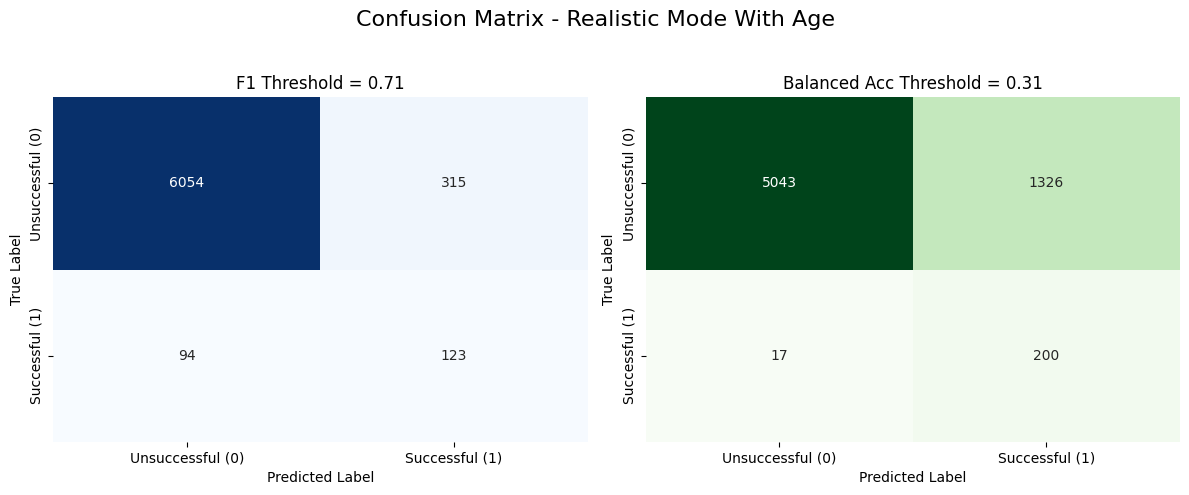

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ==============================================================================
# CONFUSION MATRIX PLOTS SIDE BY SIDE
# ==============================================================================

# Compute confusion matrices
cm_f1 = confusion_matrix(y_test, y_pred_f1_xgb)
cm_bal = confusion_matrix(y_test, y_pred_bal_xgb)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# F1 Threshold
sns.heatmap(cm_f1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[0])
axes[0].set_title(f"F1 Threshold = {thresholds_xgb['F1']:.2f}")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Balanced Accuracy Threshold
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[1])
axes[1].set_title(f"Balanced Acc Threshold = {thresholds_xgb['Balanced_Accuracy']:.2f}")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Overall title
plt.suptitle("Confusion Matrix - Realistic Mode With Age", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Confusion Matrix - Realistic Mode")
plt.show()

In [7]:
import shap
shap.initjs()

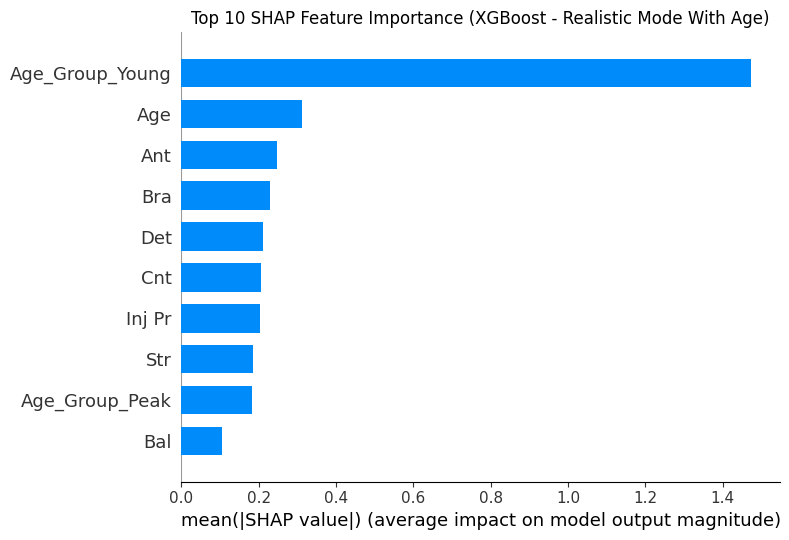

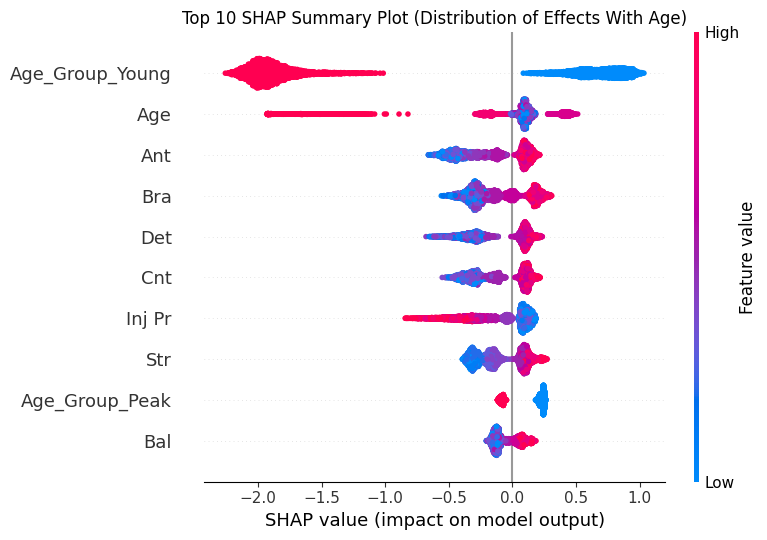

In [9]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===================================================================
# SHAP EXPLAINABILITY (XGBoost - GPU)
# ===================================================================

# Initialize SHAP JavaScript (for interactive use)
shap.initjs()

# Get the trained XGBoost model from the pipeline
xgb_model = final_pipe_xgb.named_steps["clf"]

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Save SHAP values
np.save("shap_values_xgb.npy", shap_values)

# ===================================================================
# GLOBAL FEATURE IMPORTANCE (Top 10 only)
# ===================================================================

# Compute mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Get indices of top 10 features
top10_idx = np.argsort(mean_abs_shap)[-10:][::-1]

# Subset the SHAP values and feature names
shap_values_top10 = shap_values[:, top10_idx]
X_test_top10 = X_test.iloc[:, top10_idx]

# Bar plot
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, plot_type="bar", show=False)
plt.title("Top 10 SHAP Feature Importance (XGBoost - Realistic Mode With Age)")
plt.tight_layout()
plt.savefig("shap_feature_importance_bar_top10.png", dpi=300)
plt.show()
plt.close()

# Distribution summary (beeswarm)
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, show=False)
plt.title("Top 10 SHAP Summary Plot (Distribution of Effects With Age)")
plt.tight_layout()
plt.savefig("shap_summary_distribution_top10.png", dpi=300)
plt.show()
plt.close()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import(
precision_recall_curve , recall_score , f1_score , balanced_accuracy_score ,
roc_auc_score , confusion_matrix , precision_score , classification_report ,
matthews_corrcoef , cohen_kappa_score
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import geometric_mean_score , classification_report_imbalanced
import joblib
import optuna
from optuna.samplers import TPESampler

# ==============================================================================
# CONFIGURATION
# ==============================================================================
MODE = "full"       # "realistic" drops CA/PA, "full" keeps them
SEED = 67
TEST_SIZE = 0.15
VAL_SIZE = 0.15
FILE_PATH = "/content/final_dataset_p90_success.xlsx"
N_TRIALS = 100


# ==============================================================================
# Load and transform data
# ==============================================================================
print("Reading file...")
df = pd.read_excel(FILE_PATH)
print(f"Dataset: {df.shape[0]:,} rows, {df.shape[1]} cols")
print(f"Success rate: {df['success_label'].mean()*100:.2f}%")


# drop irrelevant/leak columns
drop_cols = [
    'UID', 'Name', 'Club', 'Source_File',
    'UID_k1', 'UID_k2', 'UID_k3',
    'Transfer Value_k1', 'Transfer Value_k2', 'Transfer Value_k3',
    'success_k1', 'success_k2', 'success_k3',
    'Transfer Value',
    'Position', 'Nat'
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# drop CA/PA if realistic
if MODE == "realistic":
    df = df.drop(columns=[c for c in ["CA", "PA"] if c in df.columns], errors='ignore')
    print("MODE=realistic -> Dropped CA and PA")
else:
    print("MODE=full -> Keeping CA and PA")

# feature engineering (if full mode)
if all(col in df.columns for col in ["PA", "CA"]):
    df["Growth_Ratio"] = df["PA"] / df["CA"].replace(0, 1)
    df["Growth_Room"] = df["PA"] - df["CA"]

if 'Age' in df.columns:
    df['Age_Group_Young'] = (df['Age'] <= 20).astype(int)
    df['Age_Group_Peak'] = ((df['Age'] > 20) & (df['Age'] <= 23)).astype(int)

X = df.drop(columns=["success_label"])
y = df["success_label"]
print(f"\nFeatures: {X.shape[1]}  |  Samples: {X.shape[0]:,}")
print(f"Success distribution: {y.value_counts().to_dict()}")

# Split Train / Temp (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=VAL_SIZE + TEST_SIZE, stratify=y, random_state=SEED)
# Split Validation / Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=SEED)


# ==============================================================================
# OPTUNA OBJECTIVE FUNCTION
# ==============================================================================
def objective(trial):
    # SMOTE parameters
    smote_level = trial.suggest_categorical("smote_level", ["small", "medium", "high"])
    smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[smote_level]
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=SEED)

    # XGBoost parameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "tree_method": "gpu_hist",  # Use GPU in Colab
        "random_state": SEED,
        "eval_metric": "logloss"
    }

    clf = XGBClassifier(**params, use_label_encoder=False)

    pipe = ImbPipeline([
        ("smote", smote),
        ("clf", clf)
    ])

    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    return balanced_accuracy_score(y_val, y_val_pred)

# ==============================================================================
# RUN OPTUNA STUDY
# ==============================================================================
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=SEED), study_name="XGBoost_Full")
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)

best_params = study.best_params
print("\nBest Hyperparameters:", best_params)

# ==============================================================================
# FINAL MODEL TRAINING
# ==============================================================================
best_params_xgb = study.best_params
smote_ratio = {"small": 0.2, "medium": 0.5, "high": 1.0}[best_params_xgb['smote_level']]
best_smote_xgb= SMOTE(sampling_strategy=smote_ratio, random_state=SEED)


xgb_clf = XGBClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    colsample_bytree=best_params["colsample_bytree"],
    gamma=best_params["gamma"],
    reg_lambda=best_params["reg_lambda"],
    reg_alpha=best_params["reg_alpha"],
    tree_method="gpu_hist",  # GPU acceleration
    random_state=SEED,
    use_label_encoder=False,
    eval_metric="logloss"
)

final_pipe_xgb = ImbPipeline([
    ("smote", best_smote_xgb),
    ("clf", xgb_clf)
])

final_pipe_xgb.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Reading file...


[I 2025-12-07 17:48:23,952] A new study created in memory with name: XGBoost_Full


Dataset: 43,903 rows, 82 cols
Success rate: 3.29%
MODE=full -> Keeping CA and PA

Features: 69  |  Samples: 43,903
Success distribution: {0: 42460, 1: 1443}


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:24,898] Trial 0 finished with value: 0.8321045079464768 and parameters: {'smote_level': 'medium', 'n_estimators': 232, 'max_depth': 3, 'learning_rate': 0.0372030992310257, 'subsample': 0.6852599434737423, 'colsample_bytree': 0.9730026600325441, 'gamma': 3.6140914942793105, 'reg_lambda': 0.124105381329643, 'reg_alpha': 4.106554246922489}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:25,623] Trial 1 finished with value: 0.787737042270721 and parameters: {'smote_level': 'small', 'n_estimators': 175, 'max_depth': 5, 'learning_rate': 0.02398715961802208, 'subsample': 0.6044456461293007, 'colsample_bytree': 0.7638354039473789, 'gamma': 2.061272257629838, 'reg_lambda': 0.12200497542695123, 'reg_alpha': 4.775043967143612}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:26,549] Trial 2 finished with value: 0.759411908375639 and parameters: {'smote_level': 'medium', 'n_estimators': 223, 'max_depth': 7, 'learning_rate': 0.11130236949854995, 'subsample': 0.9813698212790307, 'colsample_bytree': 0.8407699229007761, 'gamma': 2.011257849732101, 'reg_lambda': 0.5126965547823584, 'reg_alpha': 4.070817451529237}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:27,752] Trial 3 finished with value: 0.7329283770345947 and parameters: {'smote_level': 'high', 'n_estimators': 173, 'max_depth': 8, 'learning_rate': 0.12108336578262786, 'subsample': 0.6184559914235704, 'colsample_bytree': 0.9878345575091758, 'gamma': 1.8527177160030517, 'reg_lambda': 2.593513273531763, 'reg_alpha': 1.369653507991646}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:28,845] Trial 4 finished with value: 0.7328498717747423 and parameters: {'smote_level': 'medium', 'n_estimators': 491, 'max_depth': 3, 'learning_rate': 0.20952859869129206, 'subsample': 0.7416816720920439, 'colsample_bytree': 0.9708141342722716, 'gamma': 2.002438338561486, 'reg_lambda': 0.8647735161772228, 'reg_alpha': 2.2372360543881724}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:30,125] Trial 5 finished with value: 0.7685926623750459 and parameters: {'smote_level': 'small', 'n_estimators': 371, 'max_depth': 6, 'learning_rate': 0.021500171213086904, 'subsample': 0.6607342165872642, 'colsample_bytree': 0.7814207517983819, 'gamma': 4.109489402713902, 'reg_lambda': 1.8875378029848822, 'reg_alpha': 4.985826798679207}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:31,316] Trial 6 finished with value: 0.7174334013712251 and parameters: {'smote_level': 'small', 'n_estimators': 376, 'max_depth': 5, 'learning_rate': 0.13720466600024972, 'subsample': 0.6750707006976931, 'colsample_bytree': 0.785602332749154, 'gamma': 0.06206772379572234, 'reg_lambda': 0.20563069135604445, 'reg_alpha': 0.8424929655394603}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:32,374] Trial 7 finished with value: 0.7411289056366777 and parameters: {'smote_level': 'medium', 'n_estimators': 243, 'max_depth': 9, 'learning_rate': 0.14908924043977712, 'subsample': 0.6588957406814445, 'colsample_bytree': 0.6952278886083997, 'gamma': 2.3284030773147784, 'reg_lambda': 7.933761202724934, 'reg_alpha': 2.634537739131204}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:33,557] Trial 8 finished with value: 0.7614127021510442 and parameters: {'smote_level': 'small', 'n_estimators': 108, 'max_depth': 8, 'learning_rate': 0.022055410388994137, 'subsample': 0.9175466294277452, 'colsample_bytree': 0.7322446953048619, 'gamma': 0.13480886279005622, 'reg_lambda': 8.513656174066792, 'reg_alpha': 4.739645974595556}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:34,830] Trial 9 finished with value: 0.7433270529125451 and parameters: {'smote_level': 'small', 'n_estimators': 422, 'max_depth': 6, 'learning_rate': 0.11238031518425252, 'subsample': 0.7157759383328506, 'colsample_bytree': 0.6384542062025221, 'gamma': 3.3358902069016265, 'reg_lambda': 6.775262630486915, 'reg_alpha': 0.5728747228781511}. Best is trial 0 with value: 0.8321045079464768.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:35,918] Trial 10 finished with value: 0.8700683431901048 and parameters: {'smote_level': 'high', 'n_estimators': 305, 'max_depth': 3, 'learning_rate': 0.010609701321034655, 'subsample': 0.8278331261396423, 'colsample_bytree': 0.8867949149635789, 'gamma': 4.7541639252868, 'reg_lambda': 0.2869426729039935, 'reg_alpha': 3.278653693654581}. Best is trial 10 with value: 0.8700683431901048.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:36,968] Trial 11 finished with value: 0.8694806440920431 and parameters: {'smote_level': 'high', 'n_estimators': 293, 'max_depth': 3, 'learning_rate': 0.01162677499306044, 'subsample': 0.8528284447230342, 'colsample_bytree': 0.891459679846103, 'gamma': 4.794423884250189, 'reg_lambda': 0.26880407843264764, 'reg_alpha': 3.420271901523221}. Best is trial 10 with value: 0.8700683431901048.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:38,175] Trial 12 finished with value: 0.8736032605851258 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.010545830746577164, 'subsample': 0.8444982941613374, 'colsample_bytree': 0.8808917331804552, 'gamma': 4.925601505244534, 'reg_lambda': 0.328702149698388, 'reg_alpha': 2.9848054368967127}. Best is trial 12 with value: 0.8736032605851258.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:39,736] Trial 13 finished with value: 0.8737602711048307 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.01057875242841594, 'subsample': 0.8133450542975815, 'colsample_bytree': 0.887196342793939, 'gamma': 4.923374840914375, 'reg_lambda': 0.44162978858439894, 'reg_alpha': 2.7603739181615428}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:41,139] Trial 14 finished with value: 0.8615646970569251 and parameters: {'smote_level': 'high', 'n_estimators': 324, 'max_depth': 5, 'learning_rate': 0.014433207999348323, 'subsample': 0.7759291587868797, 'colsample_bytree': 0.9118328331322464, 'gamma': 4.970812573868994, 'reg_lambda': 0.6118612623255228, 'reg_alpha': 1.9112105415637262}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:42,451] Trial 15 finished with value: 0.7751020568378082 and parameters: {'smote_level': 'high', 'n_estimators': 364, 'max_depth': 4, 'learning_rate': 0.061646556256748454, 'subsample': 0.8759102325563253, 'colsample_bytree': 0.8463057031795832, 'gamma': 4.105106862866182, 'reg_lambda': 1.5203850571750346, 'reg_alpha': 2.9072956913552366}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:43,934] Trial 16 finished with value: 0.7701584061687688 and parameters: {'smote_level': 'high', 'n_estimators': 455, 'max_depth': 4, 'learning_rate': 0.04865472856982077, 'subsample': 0.794075714305799, 'colsample_bytree': 0.9272418318223585, 'gamma': 3.003580305847441, 'reg_lambda': 0.4062444664337352, 'reg_alpha': 1.7539155899233758}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:46,508] Trial 17 finished with value: 0.8180607892395457 and parameters: {'smote_level': 'high', 'n_estimators': 273, 'max_depth': 10, 'learning_rate': 0.013847768675048668, 'subsample': 0.9112840273272478, 'colsample_bytree': 0.8407036465383123, 'gamma': 4.167992787344406, 'reg_lambda': 0.8272992853539539, 'reg_alpha': 3.6854620830557145}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:47,903] Trial 18 finished with value: 0.8129982903298966 and parameters: {'smote_level': 'high', 'n_estimators': 405, 'max_depth': 4, 'learning_rate': 0.03077370082576555, 'subsample': 0.7526806457202665, 'colsample_bytree': 0.9377659982214154, 'gamma': 0.9714865597244597, 'reg_lambda': 0.20734998238147728, 'reg_alpha': 2.733512591222411}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:50,234] Trial 19 finished with value: 0.8156674691648784 and parameters: {'smote_level': 'high', 'n_estimators': 343, 'max_depth': 7, 'learning_rate': 0.016952629692280844, 'subsample': 0.994744116404003, 'colsample_bytree': 0.8281728902090193, 'gamma': 2.901352811585645, 'reg_lambda': 0.3861944577004355, 'reg_alpha': 1.3198693583730692}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:51,455] Trial 20 finished with value: 0.7918934596395737 and parameters: {'smote_level': 'high', 'n_estimators': 271, 'max_depth': 5, 'learning_rate': 0.051460208728998195, 'subsample': 0.93004115125704, 'colsample_bytree': 0.8830689122195808, 'gamma': 4.372213753912025, 'reg_lambda': 3.9684360305375135, 'reg_alpha': 2.2200240112413656}. Best is trial 13 with value: 0.8737602711048307.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:52,678] Trial 21 finished with value: 0.8739172816245355 and parameters: {'smote_level': 'high', 'n_estimators': 320, 'max_depth': 4, 'learning_rate': 0.010385468253197187, 'subsample': 0.8309820905907669, 'colsample_bytree': 0.8804092446542483, 'gamma': 4.669586875319898, 'reg_lambda': 0.3202380586672852, 'reg_alpha': 3.2018687643418247}. Best is trial 21 with value: 0.8739172816245355.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:53,906] Trial 22 finished with value: 0.873995786884388 and parameters: {'smote_level': 'high', 'n_estimators': 325, 'max_depth': 4, 'learning_rate': 0.010151673752835665, 'subsample': 0.8157520469827619, 'colsample_bytree': 0.8707290065597301, 'gamma': 3.7104492281632426, 'reg_lambda': 0.6420888142336917, 'reg_alpha': 3.1131340990898653}. Best is trial 22 with value: 0.873995786884388.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:55,355] Trial 23 finished with value: 0.8434005425585737 and parameters: {'smote_level': 'high', 'n_estimators': 414, 'max_depth': 4, 'learning_rate': 0.01892487187310532, 'subsample': 0.799497381510854, 'colsample_bytree': 0.81597652493235, 'gamma': 3.637580795601782, 'reg_lambda': 0.6387614918971377, 'reg_alpha': 3.850986728223736}. Best is trial 22 with value: 0.873995786884388.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:56,856] Trial 24 finished with value: 0.8582696568447864 and parameters: {'smote_level': 'high', 'n_estimators': 268, 'max_depth': 6, 'learning_rate': 0.014549950910491235, 'subsample': 0.8206571485270603, 'colsample_bytree': 0.9465960005458335, 'gamma': 4.483856741247951, 'reg_lambda': 0.18797022225028232, 'reg_alpha': 3.240175862629231}. Best is trial 22 with value: 0.873995786884388.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:48:58,804] Trial 25 finished with value: 0.8255144275221995 and parameters: {'smote_level': 'high', 'n_estimators': 337, 'max_depth': 5, 'learning_rate': 0.028367135549690045, 'subsample': 0.8839662614505847, 'colsample_bytree': 0.8601732499024461, 'gamma': 3.734100436053111, 'reg_lambda': 1.3920345113728452, 'reg_alpha': 4.385569263962602}. Best is trial 22 with value: 0.873995786884388.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:48:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:00,125] Trial 26 finished with value: 0.8776451911166937 and parameters: {'smote_level': 'high', 'n_estimators': 358, 'max_depth': 4, 'learning_rate': 0.010056229153091251, 'subsample': 0.7699959092891442, 'colsample_bytree': 0.9068638785808648, 'gamma': 4.51519551499283, 'reg_lambda': 1.0470110446509446, 'reg_alpha': 2.3466130100147513}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:01,484] Trial 27 finished with value: 0.7760822822351319 and parameters: {'smote_level': 'high', 'n_estimators': 453, 'max_depth': 3, 'learning_rate': 0.0755791210616695, 'subsample': 0.7645798290340368, 'colsample_bytree': 0.9243137973578118, 'gamma': 2.994177836299842, 'reg_lambda': 0.9462522656331641, 'reg_alpha': 2.3166707278799423}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:02,775] Trial 28 finished with value: 0.8243771916051709 and parameters: {'smote_level': 'medium', 'n_estimators': 384, 'max_depth': 5, 'learning_rate': 0.01606522375348092, 'subsample': 0.7370489456953262, 'colsample_bytree': 0.8059589873596904, 'gamma': 3.895402825284552, 'reg_lambda': 2.996210687569216, 'reg_alpha': 3.550442892248819}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:03,695] Trial 29 finished with value: 0.8617195268749673 and parameters: {'smote_level': 'high', 'n_estimators': 218, 'max_depth': 3, 'learning_rate': 0.03743363311023284, 'subsample': 0.7038630765602429, 'colsample_bytree': 0.954457225250675, 'gamma': 4.519691246556803, 'reg_lambda': 1.0962137957143625, 'reg_alpha': 4.250624599318389}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:05,127] Trial 30 finished with value: 0.8220623767903561 and parameters: {'smote_level': 'medium', 'n_estimators': 348, 'max_depth': 6, 'learning_rate': 0.012366829310931443, 'subsample': 0.8635627247112337, 'colsample_bytree': 0.6047822842200143, 'gamma': 3.356558855704595, 'reg_lambda': 0.707146558154143, 'reg_alpha': 1.8898085442876245}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:06,347] Trial 31 finished with value: 0.8763106016992027 and parameters: {'smote_level': 'high', 'n_estimators': 322, 'max_depth': 4, 'learning_rate': 0.010396823231355304, 'subsample': 0.8151575230884598, 'colsample_bytree': 0.9084152207565173, 'gamma': 4.5751541761649, 'reg_lambda': 0.4277489830344187, 'reg_alpha': 3.0283210634704174}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:07,622] Trial 32 finished with value: 0.8746238289632071 and parameters: {'smote_level': 'high', 'n_estimators': 341, 'max_depth': 4, 'learning_rate': 0.010092220673615464, 'subsample': 0.7887766201918658, 'colsample_bytree': 0.9108062861038538, 'gamma': 4.487369331915519, 'reg_lambda': 0.10666141059804556, 'reg_alpha': 3.071393553801398}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:09,318] Trial 33 finished with value: 0.8392441251897211 and parameters: {'smote_level': 'high', 'n_estimators': 395, 'max_depth': 5, 'learning_rate': 0.01798909113809652, 'subsample': 0.781807717673173, 'colsample_bytree': 0.9666219574019093, 'gamma': 4.320789697867357, 'reg_lambda': 0.11914072746690377, 'reg_alpha': 2.5033914383525575}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:10,922] Trial 34 finished with value: 0.873484412344516 and parameters: {'smote_level': 'high', 'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.0132630246226219, 'subsample': 0.7260542091275745, 'colsample_bytree': 0.9988649310936581, 'gamma': 3.9129379340219623, 'reg_lambda': 0.14302350390258484, 'reg_alpha': 3.044704672364735}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:12,079] Trial 35 finished with value: 0.8503046440222606 and parameters: {'smote_level': 'high', 'n_estimators': 286, 'max_depth': 4, 'learning_rate': 0.024424873881859318, 'subsample': 0.7610200263908048, 'colsample_bytree': 0.9109776311714675, 'gamma': 3.376692116658855, 'reg_lambda': 1.2935305013970078, 'reg_alpha': 4.030771606613255}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:12,788] Trial 36 finished with value: 0.7286531114251322 and parameters: {'smote_level': 'small', 'n_estimators': 238, 'max_depth': 3, 'learning_rate': 0.2965125729043498, 'subsample': 0.795913198098964, 'colsample_bytree': 0.8591549630770631, 'gamma': 1.330135133533408, 'reg_lambda': 1.993342149103066, 'reg_alpha': 3.752966667477297}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:14,203] Trial 37 finished with value: 0.7948363165332077 and parameters: {'smote_level': 'medium', 'n_estimators': 439, 'max_depth': 5, 'learning_rate': 0.019362027848101655, 'subsample': 0.8907540459770377, 'colsample_bytree': 0.9037526092625165, 'gamma': 3.9710272012357284, 'reg_lambda': 0.5390566654369138, 'reg_alpha': 1.3754931180992296}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:15,532] Trial 38 finished with value: 0.8628589434936585 and parameters: {'smote_level': 'high', 'n_estimators': 190, 'max_depth': 7, 'learning_rate': 0.012741883886549912, 'subsample': 0.6981038462851897, 'colsample_bytree': 0.9739645148215111, 'gamma': 4.5436668135821705, 'reg_lambda': 0.17471580509275372, 'reg_alpha': 2.3399803951021876}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:16,893] Trial 39 finished with value: 0.7784396207323668 and parameters: {'smote_level': 'small', 'n_estimators': 365, 'max_depth': 6, 'learning_rate': 0.010022853814527766, 'subsample': 0.9643462191516164, 'colsample_bytree': 0.7524416915989933, 'gamma': 2.6240338982659708, 'reg_lambda': 0.11135733102637622, 'reg_alpha': 2.0612614011676182}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:17,776] Trial 40 finished with value: 0.8546224333141432 and parameters: {'smote_level': 'medium', 'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.015716258215396035, 'subsample': 0.8426175765989216, 'colsample_bytree': 0.8610104879297851, 'gamma': 4.282034034293411, 'reg_lambda': 1.8955082576711622, 'reg_alpha': 0.13575563408397118}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:18,990] Trial 41 finished with value: 0.8741146351249978 and parameters: {'smote_level': 'high', 'n_estimators': 322, 'max_depth': 4, 'learning_rate': 0.012206424986336445, 'subsample': 0.8226901364017998, 'colsample_bytree': 0.8706878984292371, 'gamma': 4.714967227114488, 'reg_lambda': 0.5076308971639463, 'reg_alpha': 3.1760847934344207}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:20,231] Trial 42 finished with value: 0.8741146351249978 and parameters: {'smote_level': 'high', 'n_estimators': 325, 'max_depth': 4, 'learning_rate': 0.012256856954900199, 'subsample': 0.8118325810738136, 'colsample_bytree': 0.9308412266901317, 'gamma': 4.719739167634192, 'reg_lambda': 0.7853488014159545, 'reg_alpha': 2.580717638750988}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:22,176] Trial 43 finished with value: 0.8709340817501439 and parameters: {'smote_level': 'high', 'n_estimators': 361, 'max_depth': 3, 'learning_rate': 0.012381974887421751, 'subsample': 0.783338155510781, 'colsample_bytree': 0.924872548338804, 'gamma': 4.723116524472687, 'reg_lambda': 0.796231173072486, 'reg_alpha': 2.5330417032424357}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:24,259] Trial 44 finished with value: 0.8423821548821548 and parameters: {'smote_level': 'high', 'n_estimators': 287, 'max_depth': 5, 'learning_rate': 0.02388523935034491, 'subsample': 0.7463919294252706, 'colsample_bytree': 0.9547419003949544, 'gamma': 4.610533563613894, 'reg_lambda': 0.5054763327788085, 'reg_alpha': 2.8227237427339498}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:25,623] Trial 45 finished with value: 0.8691731651576211 and parameters: {'smote_level': 'high', 'n_estimators': 390, 'max_depth': 4, 'learning_rate': 0.012293930493988102, 'subsample': 0.6264818511440977, 'colsample_bytree': 0.9045323184451847, 'gamma': 4.189925214795567, 'reg_lambda': 1.1178468991920347, 'reg_alpha': 3.430524332675348}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:26,154] Trial 46 finished with value: 0.7952288428324698 and parameters: {'smote_level': 'small', 'n_estimators': 115, 'max_depth': 3, 'learning_rate': 0.020967131756538672, 'subsample': 0.8356918411671727, 'colsample_bytree': 0.9742903858207294, 'gamma': 4.984711982419842, 'reg_lambda': 0.256438201817146, 'reg_alpha': 1.6961167758251956}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:28,145] Trial 47 finished with value: 0.8195120461959841 and parameters: {'smote_level': 'high', 'n_estimators': 303, 'max_depth': 8, 'learning_rate': 0.015277758736506691, 'subsample': 0.8619521993674782, 'colsample_bytree': 0.9330734064274266, 'gamma': 4.7400646831810445, 'reg_lambda': 0.4713923338318443, 'reg_alpha': 2.6188230002886304}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:29,347] Trial 48 finished with value: 0.7627832731459674 and parameters: {'smote_level': 'high', 'n_estimators': 326, 'max_depth': 4, 'learning_rate': 0.08562381515474254, 'subsample': 0.7724903214203586, 'colsample_bytree': 0.6889807239250192, 'gamma': 4.400563605105744, 'reg_lambda': 0.2388745539998217, 'reg_alpha': 2.9219708886449784}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:30,874] Trial 49 finished with value: 0.8592902252228678 and parameters: {'smote_level': 'high', 'n_estimators': 375, 'max_depth': 5, 'learning_rate': 0.013990121954460255, 'subsample': 0.808516598160329, 'colsample_bytree': 0.8973093599859734, 'gamma': 3.98514345742354, 'reg_lambda': 0.9698542575441251, 'reg_alpha': 3.4261933352974654}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:32,300] Trial 50 finished with value: 0.8682289213377297 and parameters: {'smote_level': 'high', 'n_estimators': 495, 'max_depth': 3, 'learning_rate': 0.011565726303925026, 'subsample': 0.7915930702299886, 'colsample_bytree': 0.9181807663993773, 'gamma': 4.800028516294551, 'reg_lambda': 0.3746909847376244, 'reg_alpha': 2.3739113103471428}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:33,626] Trial 51 finished with value: 0.8746238289632071 and parameters: {'smote_level': 'high', 'n_estimators': 331, 'max_depth': 4, 'learning_rate': 0.010339748152812193, 'subsample': 0.8146264454620357, 'colsample_bytree': 0.8694094837758434, 'gamma': 3.70944395621532, 'reg_lambda': 0.6860774240195626, 'reg_alpha': 3.164445072082584}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:35,516] Trial 52 finished with value: 0.8759584183806981 and parameters: {'smote_level': 'high', 'n_estimators': 338, 'max_depth': 4, 'learning_rate': 0.011452485971382254, 'subsample': 0.8072981904848867, 'colsample_bytree': 0.8397542166532344, 'gamma': 4.18470939485718, 'reg_lambda': 0.7925391082393954, 'reg_alpha': 2.730060190150531}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:36,773] Trial 53 finished with value: 0.876115428900403 and parameters: {'smote_level': 'high', 'n_estimators': 340, 'max_depth': 4, 'learning_rate': 0.011627706532509479, 'subsample': 0.853507663197483, 'colsample_bytree': 0.7846933448878919, 'gamma': 4.15845496240444, 'reg_lambda': 1.6462011766325417, 'reg_alpha': 3.030577110754313}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:38,222] Trial 54 finished with value: 0.8568543814657804 and parameters: {'smote_level': 'high', 'n_estimators': 351, 'max_depth': 5, 'learning_rate': 0.011142269364609233, 'subsample': 0.8574084092774159, 'colsample_bytree': 0.7851358039522022, 'gamma': 3.5750129519716762, 'reg_lambda': 1.5761976306918288, 'reg_alpha': 2.8257164150584813}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:39,477] Trial 55 finished with value: 0.8617195268749673 and parameters: {'smote_level': 'high', 'n_estimators': 337, 'max_depth': 4, 'learning_rate': 0.016461781603698638, 'subsample': 0.9040396916988931, 'colsample_bytree': 0.7659767946117066, 'gamma': 4.083246268741284, 'reg_lambda': 2.4607478718114106, 'reg_alpha': 3.6308083438860783}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:40,284] Trial 56 finished with value: 0.798994914603723 and parameters: {'smote_level': 'small', 'n_estimators': 298, 'max_depth': 3, 'learning_rate': 0.010040849885726648, 'subsample': 0.8429359073147487, 'colsample_bytree': 0.8325764389503507, 'gamma': 3.502940544040178, 'reg_lambda': 5.0942943356446975, 'reg_alpha': 2.1255741870295646}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:41,766] Trial 57 finished with value: 0.8557193262504144 and parameters: {'smote_level': 'high', 'n_estimators': 360, 'max_depth': 5, 'learning_rate': 0.014262375703018285, 'subsample': 0.7630704326925025, 'colsample_bytree': 0.8003712882584311, 'gamma': 4.289654316947843, 'reg_lambda': 1.2162609282120682, 'reg_alpha': 3.354497949631048}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:44,056] Trial 58 finished with value: 0.7734959700633275 and parameters: {'smote_level': 'high', 'n_estimators': 426, 'max_depth': 10, 'learning_rate': 0.03908316562196332, 'subsample': 0.734885520306028, 'colsample_bytree': 0.8200807336351511, 'gamma': 3.137266587439633, 'reg_lambda': 1.683544073601163, 'reg_alpha': 3.0233679232407313}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:45,389] Trial 59 finished with value: 0.8749781929833743 and parameters: {'smote_level': 'high', 'n_estimators': 373, 'max_depth': 4, 'learning_rate': 0.011315373273942659, 'subsample': 0.8705424210549203, 'colsample_bytree': 0.8465722863247247, 'gamma': 0.29850655210111476, 'reg_lambda': 2.470703885444024, 'reg_alpha': 3.9486346700524466}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:46,918] Trial 60 finished with value: 0.829359004553305 and parameters: {'smote_level': 'medium', 'n_estimators': 406, 'max_depth': 4, 'learning_rate': 0.017425214232894327, 'subsample': 0.8910389331491996, 'colsample_bytree': 0.7693596879476454, 'gamma': 1.7494926681972418, 'reg_lambda': 2.330391742679308, 'reg_alpha': 4.774726801997973}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:48,604] Trial 61 finished with value: 0.8722708518692974 and parameters: {'smote_level': 'high', 'n_estimators': 379, 'max_depth': 4, 'learning_rate': 0.010997836959609267, 'subsample': 0.804165930766831, 'colsample_bytree': 0.8414471247944527, 'gamma': 0.14886371696963593, 'reg_lambda': 3.3083311246942393, 'reg_alpha': 3.930189378133977}. Best is trial 26 with value: 0.8776451911166937.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:49,812] Trial 62 finished with value: 0.8796459848920989 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.011566222578757208, 'subsample': 0.867081501149461, 'colsample_bytree': 0.8511876170642401, 'gamma': 0.44510909334706356, 'reg_lambda': 2.1833963847724407, 'reg_alpha': 4.354834281036491}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:50,898] Trial 63 finished with value: 0.8672846775178381 and parameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 3, 'learning_rate': 0.013972208601745756, 'subsample': 0.9286462869119267, 'colsample_bytree': 0.7158109188958356, 'gamma': 0.6249649925452948, 'reg_lambda': 4.168126959454419, 'reg_alpha': 4.968908667704061}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:52,114] Trial 64 finished with value: 0.8749378500026168 and parameters: {'smote_level': 'high', 'n_estimators': 312, 'max_depth': 4, 'learning_rate': 0.011464080669237745, 'subsample': 0.8522365935297304, 'colsample_bytree': 0.851616984296979, 'gamma': 0.3711532725202139, 'reg_lambda': 2.119927675614308, 'reg_alpha': 4.578062470919229}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:53,242] Trial 65 finished with value: 0.7348506655501474 and parameters: {'smote_level': 'high', 'n_estimators': 280, 'max_depth': 4, 'learning_rate': 0.17980605944534722, 'subsample': 0.8739524761292007, 'colsample_bytree': 0.8122434434955517, 'gamma': 0.4419404437244002, 'reg_lambda': 2.153456066236362, 'reg_alpha': 4.532439889166826}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:54,447] Trial 66 finished with value: 0.8789012752743323 and parameters: {'smote_level': 'high', 'n_estimators': 257, 'max_depth': 5, 'learning_rate': 0.011471021350120868, 'subsample': 0.8741502718007351, 'colsample_bytree': 0.7925343341531017, 'gamma': 0.7578365507592215, 'reg_lambda': 2.7113649675406655, 'reg_alpha': 4.593454158885545}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:55,647] Trial 67 finished with value: 0.8530119851363375 and parameters: {'smote_level': 'high', 'n_estimators': 253, 'max_depth': 5, 'learning_rate': 0.02001071292947301, 'subsample': 0.8726172088891588, 'colsample_bytree': 0.7503979296069792, 'gamma': 0.8276308203197786, 'reg_lambda': 3.588313849526299, 'reg_alpha': 4.213566056647601}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:56,753] Trial 68 finished with value: 0.8739576246052929 and parameters: {'smote_level': 'high', 'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.013520607895641556, 'subsample': 0.908364169945351, 'colsample_bytree': 0.7939845229681746, 'gamma': 1.0913690879614597, 'reg_lambda': 2.7603133131733224, 'reg_alpha': 4.441123230062622}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:49:58,389] Trial 69 finished with value: 0.8594472357425725 and parameters: {'smote_level': 'high', 'n_estimators': 296, 'max_depth': 6, 'learning_rate': 0.015311919377019834, 'subsample': 0.9488707553171681, 'colsample_bytree': 0.8275590381190938, 'gamma': 0.2760065754537298, 'reg_lambda': 5.038807983509896, 'reg_alpha': 4.65937940890701}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:49:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:00,108] Trial 70 finished with value: 0.8535996842343994 and parameters: {'smote_level': 'high', 'n_estimators': 354, 'max_depth': 3, 'learning_rate': 0.028353353816919877, 'subsample': 0.8319753875604143, 'colsample_bytree': 0.7754952979719584, 'gamma': 0.6381580704751121, 'reg_lambda': 1.7520004462489212, 'reg_alpha': 4.1642998733063346}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:01,353] Trial 71 finished with value: 0.877488180596989 and parameters: {'smote_level': 'high', 'n_estimators': 311, 'max_depth': 4, 'learning_rate': 0.011839606175176117, 'subsample': 0.8976279981515827, 'colsample_bytree': 0.8469443072302295, 'gamma': 0.0381398444657885, 'reg_lambda': 1.3764792243158466, 'reg_alpha': 4.539812032797203}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:02,580] Trial 72 finished with value: 0.8770171490378744 and parameters: {'smote_level': 'high', 'n_estimators': 316, 'max_depth': 4, 'learning_rate': 0.011269671068585882, 'subsample': 0.8918351638888556, 'colsample_bytree': 0.7917680516795687, 'gamma': 0.05941913298002707, 'reg_lambda': 1.4750921891094966, 'reg_alpha': 4.944755818749893}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:03,798] Trial 73 finished with value: 0.8675245547007204 and parameters: {'smote_level': 'high', 'n_estimators': 262, 'max_depth': 5, 'learning_rate': 0.013194395949412316, 'subsample': 0.8959440849788736, 'colsample_bytree': 0.7926365471676674, 'gamma': 0.026813691717967048, 'reg_lambda': 1.4498473457630467, 'reg_alpha': 4.966473193360149}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:04,996] Trial 74 finished with value: 0.8638773311700774 and parameters: {'smote_level': 'high', 'n_estimators': 316, 'max_depth': 4, 'learning_rate': 0.017375975482938767, 'subsample': 0.9267883108412153, 'colsample_bytree': 0.7378179957226135, 'gamma': 0.5745724607483416, 'reg_lambda': 1.3065036572298636, 'reg_alpha': 4.364309065699325}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:06,146] Trial 75 finished with value: 0.8786254165140175 and parameters: {'smote_level': 'high', 'n_estimators': 284, 'max_depth': 4, 'learning_rate': 0.011671357786043253, 'subsample': 0.8830566991755225, 'colsample_bytree': 0.8205274827814348, 'gamma': 0.09434193881706138, 'reg_lambda': 0.9298968753246167, 'reg_alpha': 4.852738287326424}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:06,853] Trial 76 finished with value: 0.8057038432686101 and parameters: {'smote_level': 'small', 'n_estimators': 230, 'max_depth': 3, 'learning_rate': 0.015091451592590037, 'subsample': 0.881978365022573, 'colsample_bytree': 0.8074755924927952, 'gamma': 0.1163170369373276, 'reg_lambda': 1.1826976946263486, 'reg_alpha': 4.829434211482568}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:07,974] Trial 77 finished with value: 0.8774096753371365 and parameters: {'smote_level': 'high', 'n_estimators': 277, 'max_depth': 4, 'learning_rate': 0.013053003703185519, 'subsample': 0.9477710999491483, 'colsample_bytree': 0.8199701953841354, 'gamma': 0.7696199095752028, 'reg_lambda': 1.7659376324427012, 'reg_alpha': 4.827472655190723}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:09,024] Trial 78 finished with value: 0.8499546414054187 and parameters: {'smote_level': 'medium', 'n_estimators': 272, 'max_depth': 5, 'learning_rate': 0.013166304425218045, 'subsample': 0.9414921752945808, 'colsample_bytree': 0.8227380090560976, 'gamma': 1.119150538934156, 'reg_lambda': 2.826374302150925, 'reg_alpha': 4.889513972816652}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:10,152] Trial 79 finished with value: 0.870153390554945 and parameters: {'smote_level': 'high', 'n_estimators': 251, 'max_depth': 4, 'learning_rate': 0.0181798777415704, 'subsample': 0.9745230746387655, 'colsample_bytree': 0.877728441613291, 'gamma': 1.5193232748007532, 'reg_lambda': 1.019468369827821, 'reg_alpha': 4.68073951653099}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:13,100] Trial 80 finished with value: 0.8139021911690305 and parameters: {'smote_level': 'high', 'n_estimators': 284, 'max_depth': 9, 'learning_rate': 0.016167673219966285, 'subsample': 0.9186730789884806, 'colsample_bytree': 0.8323646488473422, 'gamma': 0.8710875350432215, 'reg_lambda': 0.8805980756979275, 'reg_alpha': 4.290921504617756}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:14,260] Trial 81 finished with value: 0.8757610648802359 and parameters: {'smote_level': 'high', 'n_estimators': 297, 'max_depth': 4, 'learning_rate': 0.011191745750516322, 'subsample': 0.8494938205067772, 'colsample_bytree': 0.7785862708029275, 'gamma': 2.228197806633057, 'reg_lambda': 1.7792589069552467, 'reg_alpha': 4.527681743696792}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:15,618] Trial 82 finished with value: 0.8786254165140175 and parameters: {'smote_level': 'high', 'n_estimators': 280, 'max_depth': 4, 'learning_rate': 0.012425985604737752, 'subsample': 0.8936151774077105, 'colsample_bytree': 0.7919152439449353, 'gamma': 0.4952785534675747, 'reg_lambda': 1.5345185628096258, 'reg_alpha': 4.73975844583627}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:17,310] Trial 83 finished with value: 0.8749760122817118 and parameters: {'smote_level': 'high', 'n_estimators': 246, 'max_depth': 4, 'learning_rate': 0.012725314995225768, 'subsample': 0.901058051356437, 'colsample_bytree': 0.8027272994231974, 'gamma': 0.20986571270724275, 'reg_lambda': 1.4518960603778586, 'reg_alpha': 4.719407780019485}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:18,315] Trial 84 finished with value: 0.8715981054063956 and parameters: {'smote_level': 'high', 'n_estimators': 264, 'max_depth': 3, 'learning_rate': 0.010717004198488873, 'subsample': 0.9462351430608328, 'colsample_bytree': 0.8158769963228144, 'gamma': 0.49096962930545834, 'reg_lambda': 1.9951271747323507, 'reg_alpha': 4.8271322265540535}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:19,431] Trial 85 finished with value: 0.8712502834912161 and parameters: {'smote_level': 'high', 'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.014241916614673377, 'subsample': 0.9982893971641638, 'colsample_bytree': 0.7947200917752505, 'gamma': 0.7520799620713845, 'reg_lambda': 1.0510447301346282, 'reg_alpha': 4.0711303250018815}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:20,585] Trial 86 finished with value: 0.8774096753371365 and parameters: {'smote_level': 'high', 'n_estimators': 288, 'max_depth': 4, 'learning_rate': 0.012870705669922562, 'subsample': 0.9175099152598942, 'colsample_bytree': 0.7587409787453759, 'gamma': 0.023508236765742374, 'reg_lambda': 1.3452073747042317, 'reg_alpha': 4.43799594651676}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:21,881] Trial 87 finished with value: 0.8685451230788018 and parameters: {'smote_level': 'high', 'n_estimators': 291, 'max_depth': 5, 'learning_rate': 0.012218201314420555, 'subsample': 0.9189406566399995, 'colsample_bytree': 0.7516426414115088, 'gamma': 0.015774772625448213, 'reg_lambda': 1.3466272310932508, 'reg_alpha': 4.467373401100869}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:23,260] Trial 88 finished with value: 0.8697946651314528 and parameters: {'smote_level': 'high', 'n_estimators': 280, 'max_depth': 3, 'learning_rate': 0.013242027663511772, 'subsample': 0.9570190899568177, 'colsample_bytree': 0.7187571008201304, 'gamma': 0.3751277965739966, 'reg_lambda': 1.5137057427629446, 'reg_alpha': 4.60839050948175}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:24,683] Trial 89 finished with value: 0.8627782575321435 and parameters: {'smote_level': 'high', 'n_estimators': 239, 'max_depth': 4, 'learning_rate': 0.02243860391022314, 'subsample': 0.935252042460419, 'colsample_bytree': 0.7596834186786274, 'gamma': 0.22325957877566427, 'reg_lambda': 2.2720508020570778, 'reg_alpha': 4.340194827016021}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:25,808] Trial 90 finished with value: 0.8345763332809966 and parameters: {'smote_level': 'medium', 'n_estimators': 304, 'max_depth': 5, 'learning_rate': 0.015007363708934712, 'subsample': 0.8857990030046579, 'colsample_bytree': 0.8561821791727628, 'gamma': 0.5252755203031397, 'reg_lambda': 0.8935744114514134, 'reg_alpha': 4.994499263384026}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:27,007] Trial 91 finished with value: 0.873446250065421 and parameters: {'smote_level': 'high', 'n_estimators': 315, 'max_depth': 4, 'learning_rate': 0.010013385052575173, 'subsample': 0.9099037619126268, 'colsample_bytree': 0.893316105946177, 'gamma': 0.7178292532484631, 'reg_lambda': 1.8663070949541076, 'reg_alpha': 4.7378330153495725}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:28,624] Trial 92 finished with value: 0.874819001762007 and parameters: {'smote_level': 'high', 'n_estimators': 292, 'max_depth': 4, 'learning_rate': 0.010692007572276958, 'subsample': 0.8960864978031532, 'colsample_bytree': 0.8092992099095212, 'gamma': 0.39851982251455226, 'reg_lambda': 1.127082469827579, 'reg_alpha': 4.893125947696451}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:29,709] Trial 93 finished with value: 0.8760347429388881 and parameters: {'smote_level': 'high', 'n_estimators': 260, 'max_depth': 4, 'learning_rate': 0.011877923270963927, 'subsample': 0.8811856218397726, 'colsample_bytree': 0.7388987248195313, 'gamma': 0.1314305492065207, 'reg_lambda': 1.2695008144424014, 'reg_alpha': 4.431818159906566}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:30,955] Trial 94 finished with value: 0.7638038415240488 and parameters: {'smote_level': 'high', 'n_estimators': 330, 'max_depth': 4, 'learning_rate': 0.09711607053586657, 'subsample': 0.8678192882503002, 'colsample_bytree': 0.7715683020842392, 'gamma': 0.9197145060766603, 'reg_lambda': 0.560703428347618, 'reg_alpha': 4.613617343406459}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:32,315] Trial 95 finished with value: 0.7657283107412641 and parameters: {'smote_level': 'small', 'n_estimators': 276, 'max_depth': 7, 'learning_rate': 0.012650460997614502, 'subsample': 0.920077288203609, 'colsample_bytree': 0.7885850844058511, 'gamma': 0.0046785581105133825, 'reg_lambda': 1.524009161428192, 'reg_alpha': 4.161897759310014}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:33,414] Trial 96 finished with value: 0.8689311072730762 and parameters: {'smote_level': 'high', 'n_estimators': 305, 'max_depth': 3, 'learning_rate': 0.010748714658949929, 'subsample': 0.9629093440327291, 'colsample_bytree': 0.8381537641237983, 'gamma': 0.3481733888631827, 'reg_lambda': 3.048494443194208, 'reg_alpha': 4.8083778087900155}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:34,457] Trial 97 finished with value: 0.8245723644039706 and parameters: {'smote_level': 'high', 'n_estimators': 222, 'max_depth': 4, 'learning_rate': 0.058613894820335556, 'subsample': 0.9835908868593249, 'colsample_bytree': 0.8269010676488227, 'gamma': 1.0301214435693282, 'reg_lambda': 1.9084012001593142, 'reg_alpha': 3.7885074936674954}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:36,269] Trial 98 finished with value: 0.8704674115943546 and parameters: {'smote_level': 'high', 'n_estimators': 320, 'max_depth': 4, 'learning_rate': 0.014134828063560263, 'subsample': 0.9017310197775509, 'colsample_bytree': 0.7981076108869605, 'gamma': 2.620802416129189, 'reg_lambda': 0.9935775994045392, 'reg_alpha': 1.0253632060520368}. Best is trial 62 with value: 0.8796459848920989.


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




[I 2025-12-07 17:50:38,185] Trial 99 finished with value: 0.8473236248495315 and parameters: {'smote_level': 'high', 'n_estimators': 478, 'max_depth': 5, 'learning_rate': 0.01182280457127721, 'subsample': 0.8887735017396895, 'colsample_bytree': 0.9404785345490183, 'gamma': 1.200002095168152, 'reg_lambda': 2.6000720164136544, 'reg_alpha': 4.511332677901987}. Best is trial 62 with value: 0.8796459848920989.

Best Hyperparameters: {'smote_level': 'high', 'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.011566222578757208, 'subsample': 0.867081501149461, 'colsample_bytree': 0.8511876170642401, 'gamma': 0.44510909334706356, 'reg_lambda': 2.1833963847724407, 'reg_alpha': 4.354834281036491}


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,1.0
,random_state,67
,k_neighbors,5
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [11]:
fig2 = optuna.visualization.plot_optimization_history(study)
fig2.write_html("optimization_history_full.html")
fig2.show()

In [12]:
print(study.best_value)
best_params

0.8796459848920989


{'smote_level': 'high',
 'n_estimators': 309,
 'max_depth': 4,
 'learning_rate': 0.011566222578757208,
 'subsample': 0.867081501149461,
 'colsample_bytree': 0.8511876170642401,
 'gamma': 0.44510909334706356,
 'reg_lambda': 2.1833963847724407,
 'reg_alpha': 4.354834281036491}

In [13]:
# ==============================================================================
# FINAL EVALUATION ON TEST (XGBoost - Full Mode)
# ==============================================================================

# Predict probabilities
y_test_pred_prop_xgb_full = final_pipe_xgb.predict_proba(X_test)[:, 1]

# Find thresholds
thresholds_xgb_full = {"F1": None, "Balanced_Accuracy": None}
best_f1_xgb_full = 0
best_bal_xgb_full = 0

for t in np.arange(0.1, 0.91, 0.01):
    y_pred_t = (y_test_pred_prop_xgb_full >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    bal_t = balanced_accuracy_score(y_test, y_pred_t)

    if f1_t > best_f1_xgb_full:
        best_f1_xgb_full = f1_t
        thresholds_xgb_full["F1"] = t
    if bal_t > best_bal_xgb_full:
        best_bal_xgb_full = bal_t
        thresholds_xgb_full["Balanced_Accuracy"] = t

# Predictions
y_pred_f1_xgb_full = (y_test_pred_prop_xgb_full >= thresholds_xgb_full["F1"]).astype(int)
y_pred_bal_xgb_full = (y_test_pred_prop_xgb_full >= thresholds_xgb_full["Balanced_Accuracy"]).astype(int)

# Metrics dicts
metrics_f1_xgb_full = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_f1_xgb_full),
    "precision": precision_score(y_test, y_pred_f1_xgb_full),
    "recall": recall_score(y_test, y_pred_f1_xgb_full),
    "f1": f1_score(y_test, y_pred_f1_xgb_full),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb_full),
    "geometric_mean": geometric_mean_score(y_test, y_pred_f1_xgb_full),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_f1_xgb_full),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_f1_xgb_full)
}

metrics_bal_xgb_full = {
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_bal_xgb_full),
    "precision": precision_score(y_test, y_pred_bal_xgb_full),
    "recall": recall_score(y_test, y_pred_bal_xgb_full),
    "f1": f1_score(y_test, y_pred_bal_xgb_full),
    "roc_auc": roc_auc_score(y_test, y_test_pred_prop_xgb_full),
    "geometric_mean": geometric_mean_score(y_test, y_pred_bal_xgb_full),
    "matthews_corrcoef": matthews_corrcoef(y_test, y_pred_bal_xgb_full),
    "cohen_kappa": cohen_kappa_score(y_test, y_pred_bal_xgb_full)
}

# Print XGBoost results
print("\nFINAL EVALUATION ON TEST SET (XGBoost - FULL MODE)")
print("="*70)

print(f"\nUsing F1 Threshold ({thresholds_xgb_full['F1']:.3f})")
print(f"Balanced Accuracy: {metrics_f1_xgb_full['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_f1_xgb_full['precision']:.4f}")
print(f"Recall: {metrics_f1_xgb_full['recall']:.4f}")
print(f"F1 Score: {metrics_f1_xgb_full['f1']:.4f}")
print(f"ROC-AUC: {metrics_f1_xgb_full['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_f1_xgb_full['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_f1_xgb_full['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_f1_xgb_full['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_f1_xgb_full))
print("\nClassification Report:\n", classification_report(y_test, y_pred_f1_xgb_full))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_f1_xgb_full))

print(f"\nUsing Balanced Accuracy Threshold ({thresholds_xgb_full['Balanced_Accuracy']:.3f})")
print(f"Balanced Accuracy: {metrics_bal_xgb_full['balanced_accuracy']:.4f}")
print(f"Precision: {metrics_bal_xgb_full['precision']:.4f}")
print(f"Recall: {metrics_bal_xgb_full['recall']:.4f}")
print(f"F1 Score: {metrics_bal_xgb_full['f1']:.4f}")
print(f"ROC-AUC: {metrics_bal_xgb_full['roc_auc']:.4f}")
print(f"Geometric Mean: {metrics_bal_xgb_full['geometric_mean']:.4f}")
print(f"Matthews Corr: {metrics_bal_xgb_full['matthews_corrcoef']:.4f}")
print(f"Cohen Kappa: {metrics_bal_xgb_full['cohen_kappa']:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bal_xgb_full))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal_xgb_full))
print("\nImbalanced Report:\n", classification_report_imbalanced(y_test, y_pred_bal_xgb_full))

# Save study results
best_params_xgb_full = study.best_params
best_value_xgb_full = study.best_value
study_xgb_full = study

# Save XGBoost model dict
model_dict_xgb_full = {
    "best_params": best_params_xgb_full,
    "best_value": best_value_xgb_full,
    "thresholds": thresholds_xgb_full,
    "metrics_f1": metrics_f1_xgb_full,
    "metrics_balanced_accuracy": metrics_bal_xgb_full,
    "study": study_xgb_full,
    "model": final_pipe_xgb
}

joblib.dump(model_dict_xgb_full, "XGBoost_full_model.pkl")


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"





FINAL EVALUATION ON TEST SET (XGBoost - FULL MODE)

Using F1 Threshold (0.800)
Balanced Accuracy: 0.7542
Precision: 0.4113
Recall: 0.5346
F1 Score: 0.4649
ROC-AUC: 0.9539
Geometric Mean: 0.7215
Matthews Corr: 0.4484
Cohen Kappa: 0.4442

Confusion Matrix:
 [[6203  166]
 [ 101  116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      6369
           1       0.41      0.53      0.46       217

    accuracy                           0.96      6586
   macro avg       0.70      0.75      0.72      6586
weighted avg       0.97      0.96      0.96      6586


Imbalanced Report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.97      0.53      0.98      0.72      0.54      6369
          1       0.41      0.53      0.97      0.46      0.72      0.50       217

avg / total       0.97      0.96      0.55      0.96      0.72      0.54      6586


Using B

['XGBoost_full_model.pkl']

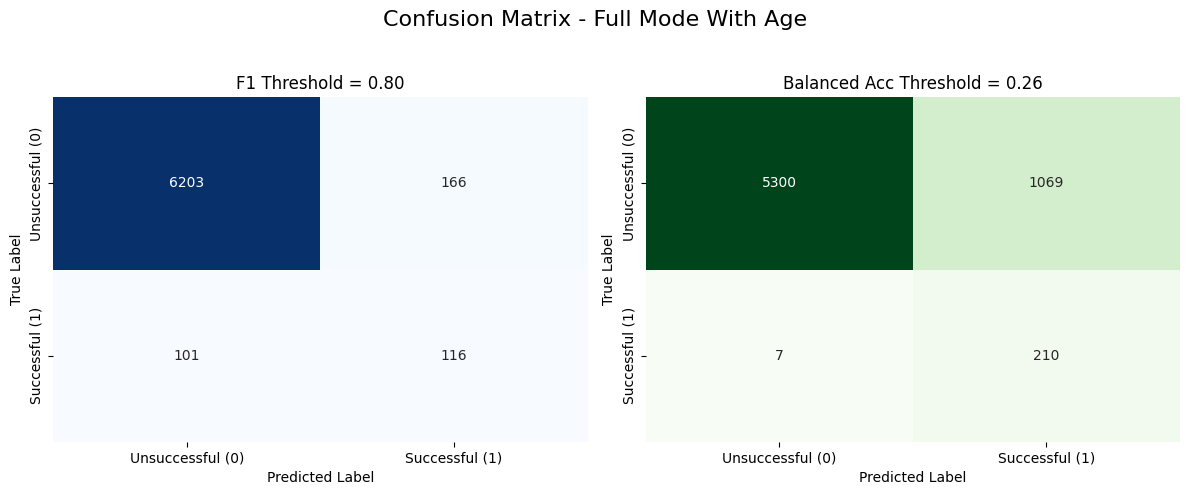

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ==============================================================================
# CONFUSION MATRIX PLOTS SIDE BY SIDE
# ==============================================================================

# Compute confusion matrices
cm_f1 = confusion_matrix(y_test, y_pred_f1_xgb_full)
cm_bal = confusion_matrix(y_test, y_pred_bal_xgb_full)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# F1 Threshold
sns.heatmap(cm_f1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[0])
axes[0].set_title(f"F1 Threshold = {thresholds_xgb_full['F1']:.2f}")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Balanced Accuracy Threshold
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Unsuccessful (0)", "Successful (1)"],
            yticklabels=["Unsuccessful (0)", "Successful (1)"],
            ax=axes[1])
axes[1].set_title(f"Balanced Acc Threshold = {thresholds_xgb_full['Balanced_Accuracy']:.2f}")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Overall title
plt.suptitle("Confusion Matrix - Full Mode With Age", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Confusion Matrix - Full Mode")
plt.show()

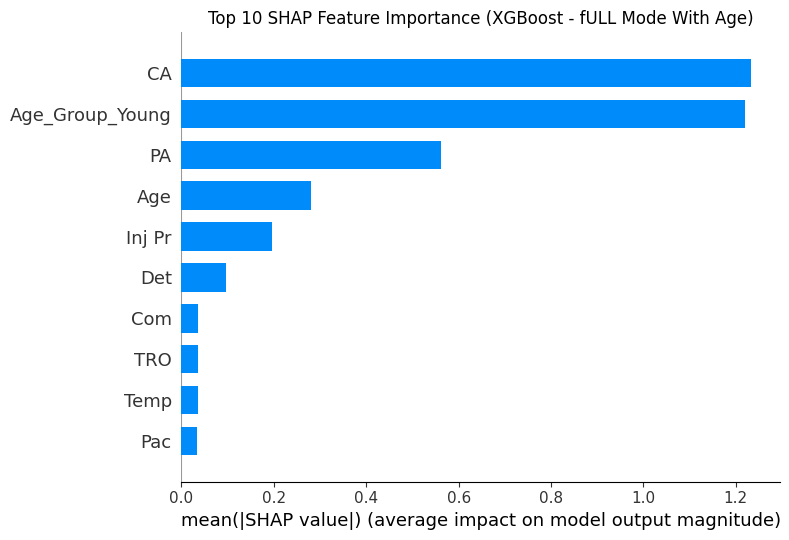

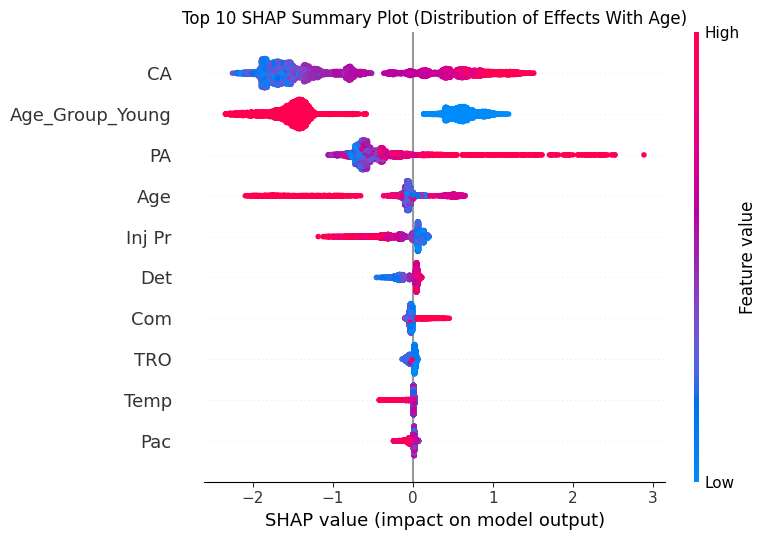

In [15]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===================================================================
# SHAP EXPLAINABILITY (XGBoost - GPU)
# ===================================================================

# Initialize SHAP JavaScript (for interactive use)
shap.initjs()

# Get the trained XGBoost model from the pipeline
xgb_model = final_pipe_xgb.named_steps["clf"]

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Save SHAP values
np.save("shap_values_xgb.npy", shap_values)

# ===================================================================
# GLOBAL FEATURE IMPORTANCE (Top 10 only)
# ===================================================================

# Compute mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Get indices of top 10 features
top10_idx = np.argsort(mean_abs_shap)[-10:][::-1]

# Subset the SHAP values and feature names
shap_values_top10 = shap_values[:, top10_idx]
X_test_top10 = X_test.iloc[:, top10_idx]

# Bar plot
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, plot_type="bar", show=False)
plt.title("Top 10 SHAP Feature Importance (XGBoost - fULL Mode With Age)")
plt.tight_layout()
plt.savefig("shap_feature_importance_bar_top10.png", dpi=300)
plt.show()
plt.close()

# Distribution summary (beeswarm)
plt.figure()
shap.summary_plot(shap_values_top10, X_test_top10, show=False)
plt.title("Top 10 SHAP Summary Plot (Distribution of Effects With Age)")
plt.tight_layout()
plt.savefig("shap_summary_distribution_top10.png", dpi=300)
plt.show()
plt.close()

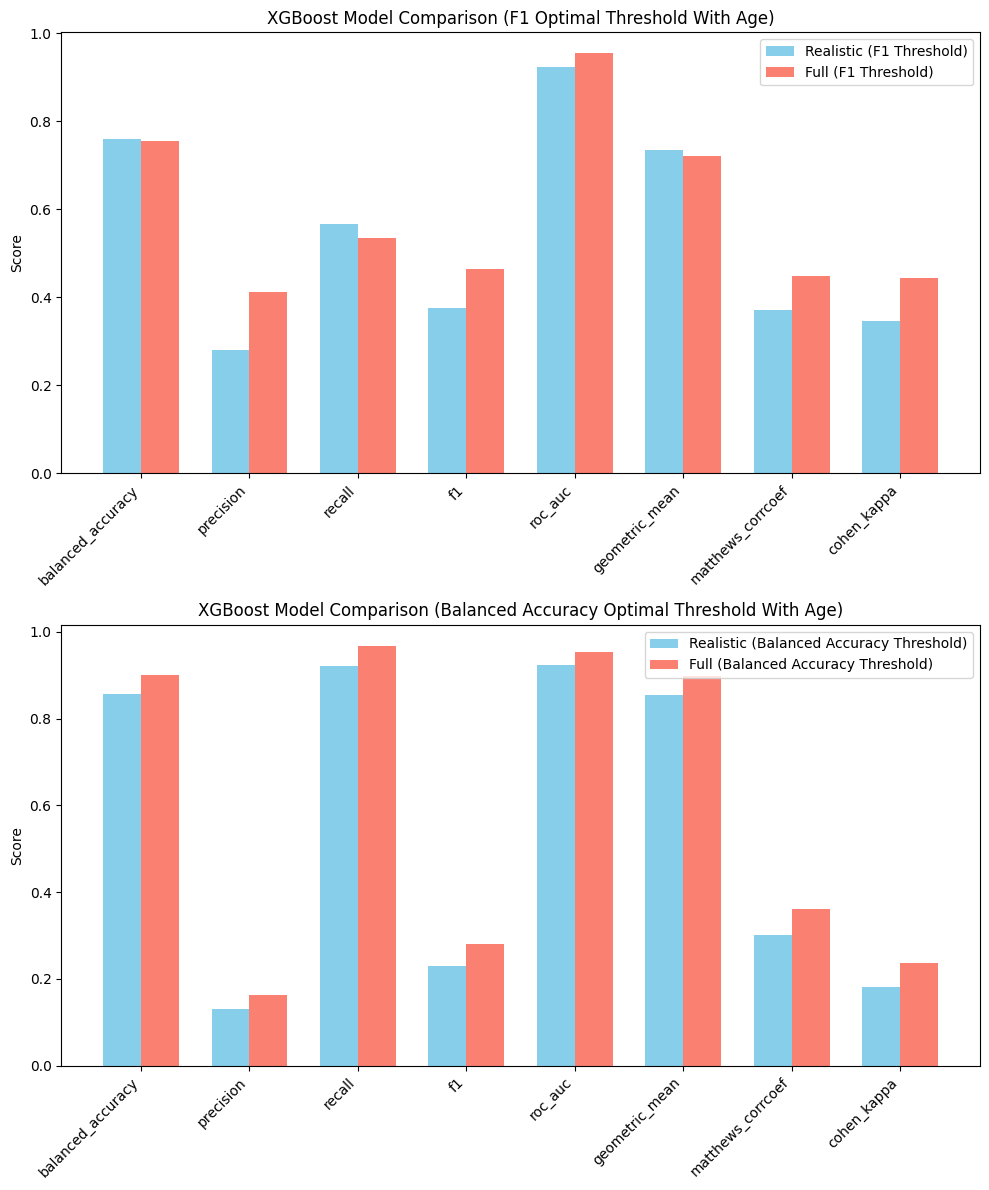

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract metrics for comparison
metrics_f1_realistic = model_dict_xgb['metrics_f1']
metrics_f1_full = model_dict_xgb_full['metrics_f1']
metrics_bal_realistic = model_dict_xgb['metrics_balanced_accuracy']
metrics_bal_full = model_dict_xgb_full['metrics_balanced_accuracy']

# Create DataFrames for easier plotting
df_f1 = pd.DataFrame({
    "Metric": metrics_f1_realistic.keys(),
    "Realistic (F1 Threshold)": metrics_f1_realistic.values(),
    "Full (F1 Threshold)": metrics_f1_full.values()
})

df_bal = pd.DataFrame({
    "Metric": metrics_bal_realistic.keys(),
    "Realistic (Balanced Accuracy Threshold)": metrics_bal_realistic.values(),
    "Full (Balanced Accuracy Threshold)": metrics_bal_full.values()
})

# Create a 2x1 grid of plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12)) 

# Plotting F1-optimal threshold metrics in the first subplot
bar_width = 0.35
x_f1 = np.arange(len(df_f1["Metric"]))

rects1_f1 = axes[0].bar(x_f1 - bar_width/2, df_f1["Realistic (F1 Threshold)"], bar_width, label='Realistic (F1 Threshold)', color='skyblue')
rects2_f1 = axes[0].bar(x_f1 + bar_width/2, df_f1["Full (F1 Threshold)"], bar_width, label='Full (F1 Threshold)', color='salmon')

axes[0].set_ylabel("Score")
axes[0].set_title("XGBoost Model Comparison (F1 Optimal Threshold With Age)")
axes[0].set_xticks(x_f1)
axes[0].set_xticklabels(df_f1["Metric"], rotation=45, ha='right')
axes[0].legend()

# Plotting Balanced Accuracy-optimal threshold metrics in the second subplot
bar_width = 0.35
x_bal = np.arange(len(df_bal["Metric"]))

rects1_bal = axes[1].bar(x_bal - bar_width/2, df_bal["Realistic (Balanced Accuracy Threshold)"], bar_width, label='Realistic (Balanced Accuracy Threshold)', color='skyblue')
rects2_bal = axes[1].bar(x_bal + bar_width/2, df_bal["Full (Balanced Accuracy Threshold)"], bar_width, label='Full (Balanced Accuracy Threshold)', color='salmon')

axes[1].set_ylabel("Score")
axes[1].set_title("XGBoost Model Comparison (Balanced Accuracy Optimal Threshold With Age)")
axes[1].set_xticks(x_bal)
axes[1].set_xticklabels(df_bal["Metric"], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
# Save the combined 2x1 plot
plt.savefig("xgboost_model_comparison_2x1_grid.png")
plt.show()

Reading file...
Dataset: 43,903 rows, 82 cols
Success rate: 3.29%


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:58:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:160: UserWarning:

[17:58:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




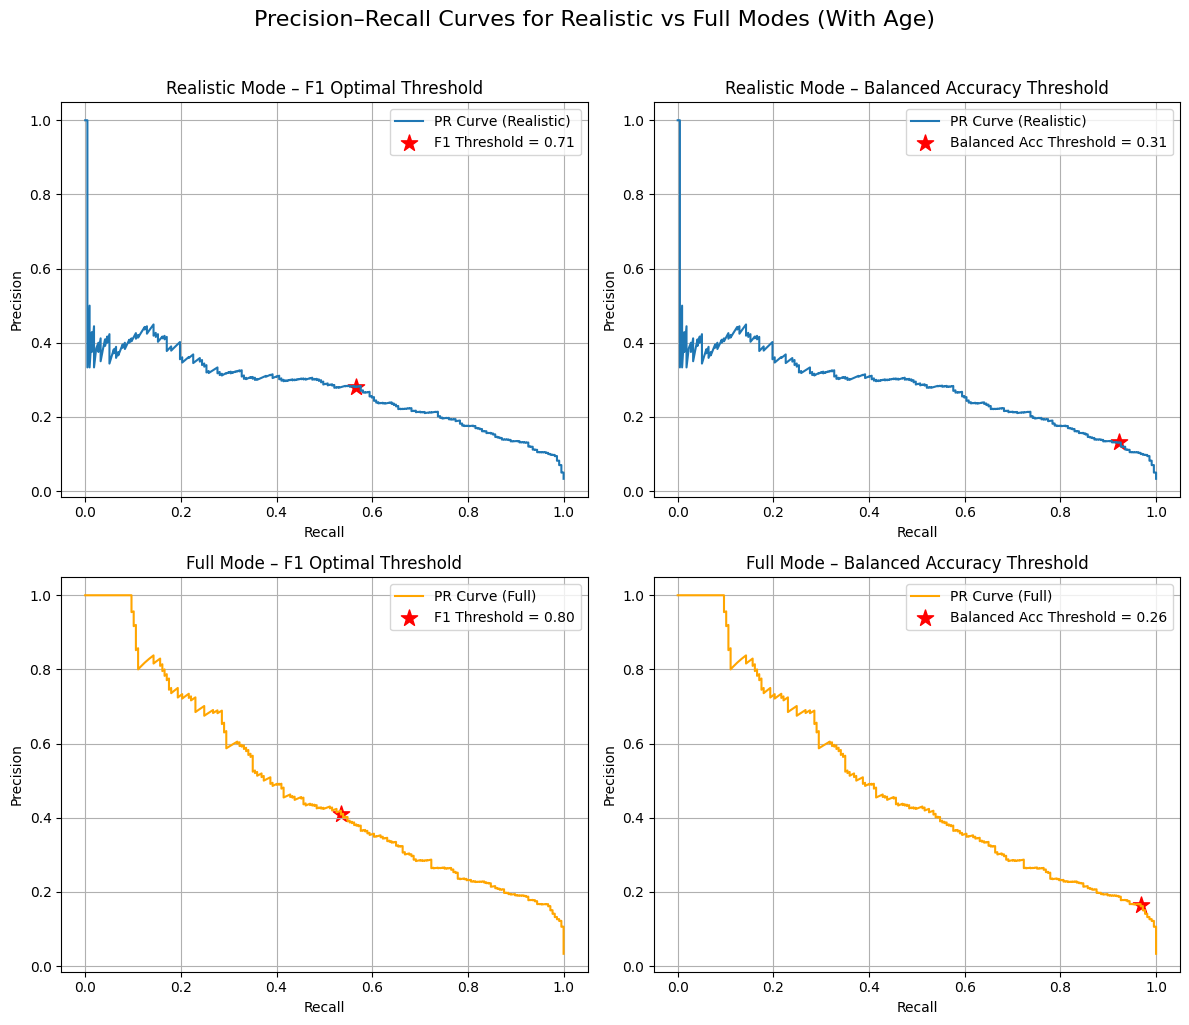

In [19]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import joblib

# ==============================================================================
# CONFIGURATION
# ==============================================================================
SEED = 67
TEST_SIZE = 0.15
VAL_SIZE = 0.15
FILE_PATH = "/content/final_dataset_p90_success.xlsx"

# ==============================================================================
# Load XGBoost Models
# ==============================================================================
xgb_realistic = joblib.load("XGBoost_realistic_model.pkl")
xgb_full = joblib.load("XGBoost_full_model.pkl")

# ==============================================================================
# Load and prepare base dataset
# ==============================================================================
print("Reading file...")
df = pd.read_excel(FILE_PATH)
print(f"Dataset: {df.shape[0]:,} rows, {df.shape[1]} cols")
print(f"Success rate: {df['success_label'].mean()*100:.2f}%")

drop_cols = [
    'UID','Name','Club','Source_File',
    'UID_k1','UID_k2','UID_k3',
    'Transfer Value_k1','Transfer Value_k2','Transfer Value_k3',
    'success_k1','success_k2','success_k3',
    'Transfer Value',
    'Position','Nat'
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# ==============================================================================
# AGE GROUP FEATURE (apply BEFORE splitting)
# ==============================================================================
if 'Age' in df.columns:
    df["Age_Group_Young"] = (df["Age"] <= 20).astype(int)
    df["Age_Group_Peak"] = ((df["Age"] > 20) & (df["Age"] <= 23)).astype(int)

# ==============================================================================
# REALISTIC MODE DATA
# ==============================================================================
df_realistic = df.drop(columns=[c for c in ["CA", "PA"] if c in df.columns], errors='ignore')

X_realistic = df_realistic.drop(columns=["success_label"])
y_realistic = df_realistic["success_label"]

X_train_R, X_temp_R, y_train_R, y_temp_R = train_test_split(
    X_realistic, y_realistic,
    test_size=TEST_SIZE + VAL_SIZE,
    stratify=y_realistic,
    random_state=SEED
)
X_val_R, X_test_R, y_val_R, y_test_R = train_test_split(
    X_temp_R, y_temp_R,
    test_size=0.5,
    stratify=y_temp_R,
    random_state=SEED
)

# ==============================================================================
# FULL MODE DATA
# ==============================================================================
df_full = df.copy()

# Add feature-engineering (only when CA and PA exist)
if all(col in df_full.columns for col in ["CA", "PA"]):
    df_full["Growth_Ratio"] = df_full["PA"] / df_full["CA"].replace(0, 1)
    df_full["Growth_Room"] = df_full["PA"] - df_full["CA"]

X_full = df_full.drop(columns=["success_label"])
y_full = df_full["success_label"]

X_train_F, X_temp_F, y_train_F, y_temp_F = train_test_split(
    X_full, y_full,
    test_size=TEST_SIZE + VAL_SIZE,
    stratify=y_full,
    random_state=SEED
)
X_val_F, X_test_F, y_val_F, y_test_F = train_test_split(
    X_temp_F, y_temp_F,
    test_size=0.5,
    stratify=y_temp_F,
    random_state=SEED
)

# ==============================================================================
# FIX COLUMN ORDER MISMATCH
# ==============================================================================
feature_order_R = xgb_realistic["model"].named_steps["clf"].feature_names_in_
X_test_R = X_test_R[feature_order_R]

feature_order_F = xgb_full["model"].named_steps["clf"].feature_names_in_
X_test_F = X_test_F[feature_order_F]

# ==============================================================================
# PRECISION–RECALL CURVES
# ==============================================================================
y_prob_R = xgb_realistic["model"].predict_proba(X_test_R)[:, 1]
y_prob_F = xgb_full["model"].predict_proba(X_test_F)[:, 1]

prec_R, rec_R, thr_R = precision_recall_curve(y_test_R, y_prob_R)
prec_F, rec_F, thr_F = precision_recall_curve(y_test_F, y_prob_F)

thr_R_f1 = xgb_realistic["thresholds"]["F1"]
thr_R_bal = xgb_realistic["thresholds"]["Balanced_Accuracy"]
thr_F_f1 = xgb_full["thresholds"]["F1"]
thr_F_bal = xgb_full["thresholds"]["Balanced_Accuracy"]

def closest_idx(thr_list, target):
    return np.argmin(np.abs(thr_list - target))

idx_R_f1  = closest_idx(thr_R, thr_R_f1)
idx_R_bal = closest_idx(thr_R, thr_R_bal)
idx_F_f1  = closest_idx(thr_F, thr_F_f1)
idx_F_bal = closest_idx(thr_F, thr_F_bal)

# ==============================================================================
# PLOT: 2×2 GRID WITH SUPTITLE + star markers
# ==============================================================================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

fig.suptitle(
    "Precision–Recall Curves for Realistic vs Full Modes (With Age)",
    fontsize=16,
    y=1.02
)

# --- Realistic (F1)
axes[0, 0].plot(rec_R, prec_R, label="PR Curve (Realistic)")
axes[0, 0].scatter(
    rec_R[idx_R_f1], prec_R[idx_R_f1],
    color='red', s=150, marker='*',
    label=f"F1 Threshold = {thr_R_f1:.2f}"
)
axes[0, 0].set_title("Realistic Mode – F1 Optimal Threshold")
axes[0, 0].set_xlabel("Recall")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].legend()
axes[0, 0].grid(True)

# --- Realistic (Balanced Accuracy)
axes[0, 1].plot(rec_R, prec_R, label="PR Curve (Realistic)")
axes[0, 1].scatter(
    rec_R[idx_R_bal], prec_R[idx_R_bal],
    color='red', s=150, marker='*',
    label=f"Balanced Acc Threshold = {thr_R_bal:.2f}"
)
axes[0, 1].set_title("Realistic Mode – Balanced Accuracy Threshold")
axes[0, 1].set_xlabel("Recall")
axes[0, 1].set_ylabel("Precision")
axes[0, 1].legend()
axes[0, 1].grid(True)

# --- Full (F1)
axes[1, 0].plot(rec_F, prec_F, color='orange', label="PR Curve (Full)")
axes[1, 0].scatter(
    rec_F[idx_F_f1], prec_F[idx_F_f1],
    color='red', s=150, marker='*',
    label=f"F1 Threshold = {thr_F_f1:.2f}"
)
axes[1, 0].set_title("Full Mode – F1 Optimal Threshold")
axes[1, 0].set_xlabel("Recall")
axes[1, 0].set_ylabel("Precision")
axes[1, 0].legend()
axes[1, 0].grid(True)

# --- Full (Balanced Accuracy)
axes[1, 1].plot(rec_F, prec_F, color='orange', label="PR Curve (Full)")
axes[1, 1].scatter(
    rec_F[idx_F_bal], prec_F[idx_F_bal],
    color='red', s=150, marker='*',
    label=f"Balanced Acc Threshold = {thr_F_bal:.2f}"
)
axes[1, 1].set_title("Full Mode – Balanced Accuracy Threshold")
axes[1, 1].set_xlabel("Recall")
axes[1, 1].set_ylabel("Precision")
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig("xgboost_precision_recall_4grid.png", dpi=300)
plt.show()

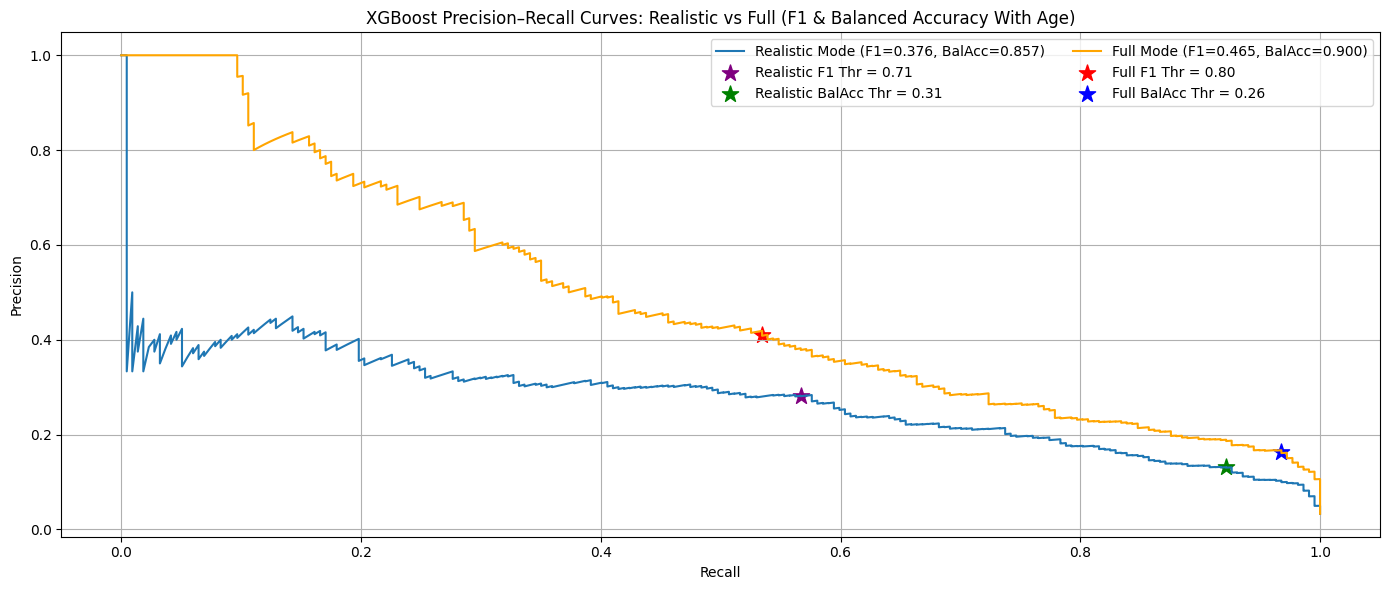

In [23]:
# ======================================================================
# COMBINED PRECISION–RECALL PLOT (Realistic vs Full)
# ======================================================================

# Correct PR curves
precision_realistic, recall_realistic, thresholds_realistic = precision_recall_curve(
    y_test_R, y_prob_R
)
precision_full, recall_full, thresholds_full = precision_recall_curve(
    y_test_F, y_prob_F
)

# Extract thresholds
f1_thr_R  = xgb_realistic["thresholds"]["F1"]
bal_thr_R = xgb_realistic["thresholds"]["Balanced_Accuracy"]
f1_thr_F  = xgb_full["thresholds"]["F1"]
bal_thr_F = xgb_full["thresholds"]["Balanced_Accuracy"]

# Correct index finder
def closest_idx(thr_list, target):
    return np.argmin(np.abs(thr_list - target))

idx_R_f1  = closest_idx(thresholds_realistic, f1_thr_R)
idx_R_bal = closest_idx(thresholds_realistic, bal_thr_R)
idx_F_f1  = closest_idx(thresholds_full, f1_thr_F)
idx_F_bal = closest_idx(thresholds_full, bal_thr_F)

# Values for plot
f1_prec_R,  f1_rec_R  = precision_realistic[idx_R_f1],   recall_realistic[idx_R_f1]
bal_prec_R, bal_rec_R = precision_realistic[idx_R_bal],  recall_realistic[idx_R_bal]
f1_prec_F,  f1_rec_F  = precision_full[idx_F_f1],        recall_full[idx_F_f1]
bal_prec_F, bal_rec_F = precision_full[idx_F_bal],       recall_full[idx_F_bal]

# ======================================================
# PLOT
# ======================================================
plt.figure(figsize=(14, 6))

# Realistic Mode PR Curve
plt.plot(
    recall_realistic, precision_realistic,
    label=f"Realistic Mode (F1={xgb_realistic['metrics_f1']['f1']:.3f}, "
          f"BalAcc={xgb_realistic['metrics_balanced_accuracy']['balanced_accuracy']:.3f})"
)

# Realistic markers
plt.scatter(f1_rec_R,  f1_prec_R,  color="purple", marker="*", s=150,
            label=f"Realistic F1 Thr = {f1_thr_R:.2f}")
plt.scatter(bal_rec_R, bal_prec_R, color="green", marker="*", s=150,
            label=f"Realistic BalAcc Thr = {bal_thr_R:.2f}")

# Full Mode PR Curve
plt.plot(
    recall_full, precision_full,
    color="orange",
    label=f"Full Mode (F1={xgb_full['metrics_f1']['f1']:.3f}, "
          f"BalAcc={xgb_full['metrics_balanced_accuracy']['balanced_accuracy']:.3f})"
)

# Full markers
plt.scatter(f1_rec_F,  f1_prec_F,  color="red", marker="*", s=150,
            label=f"Full F1 Thr = {f1_thr_F:.2f}")
plt.scatter(bal_rec_F, bal_prec_F, color="blue", marker="*", s=150,
            label=f"Full BalAcc Thr = {bal_thr_F:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("XGBoost Precision–Recall Curves: Realistic vs Full (F1 & Balanced Accuracy With Age)")
plt.legend(ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_precision_recall_combined.png", dpi=300)
plt.show()

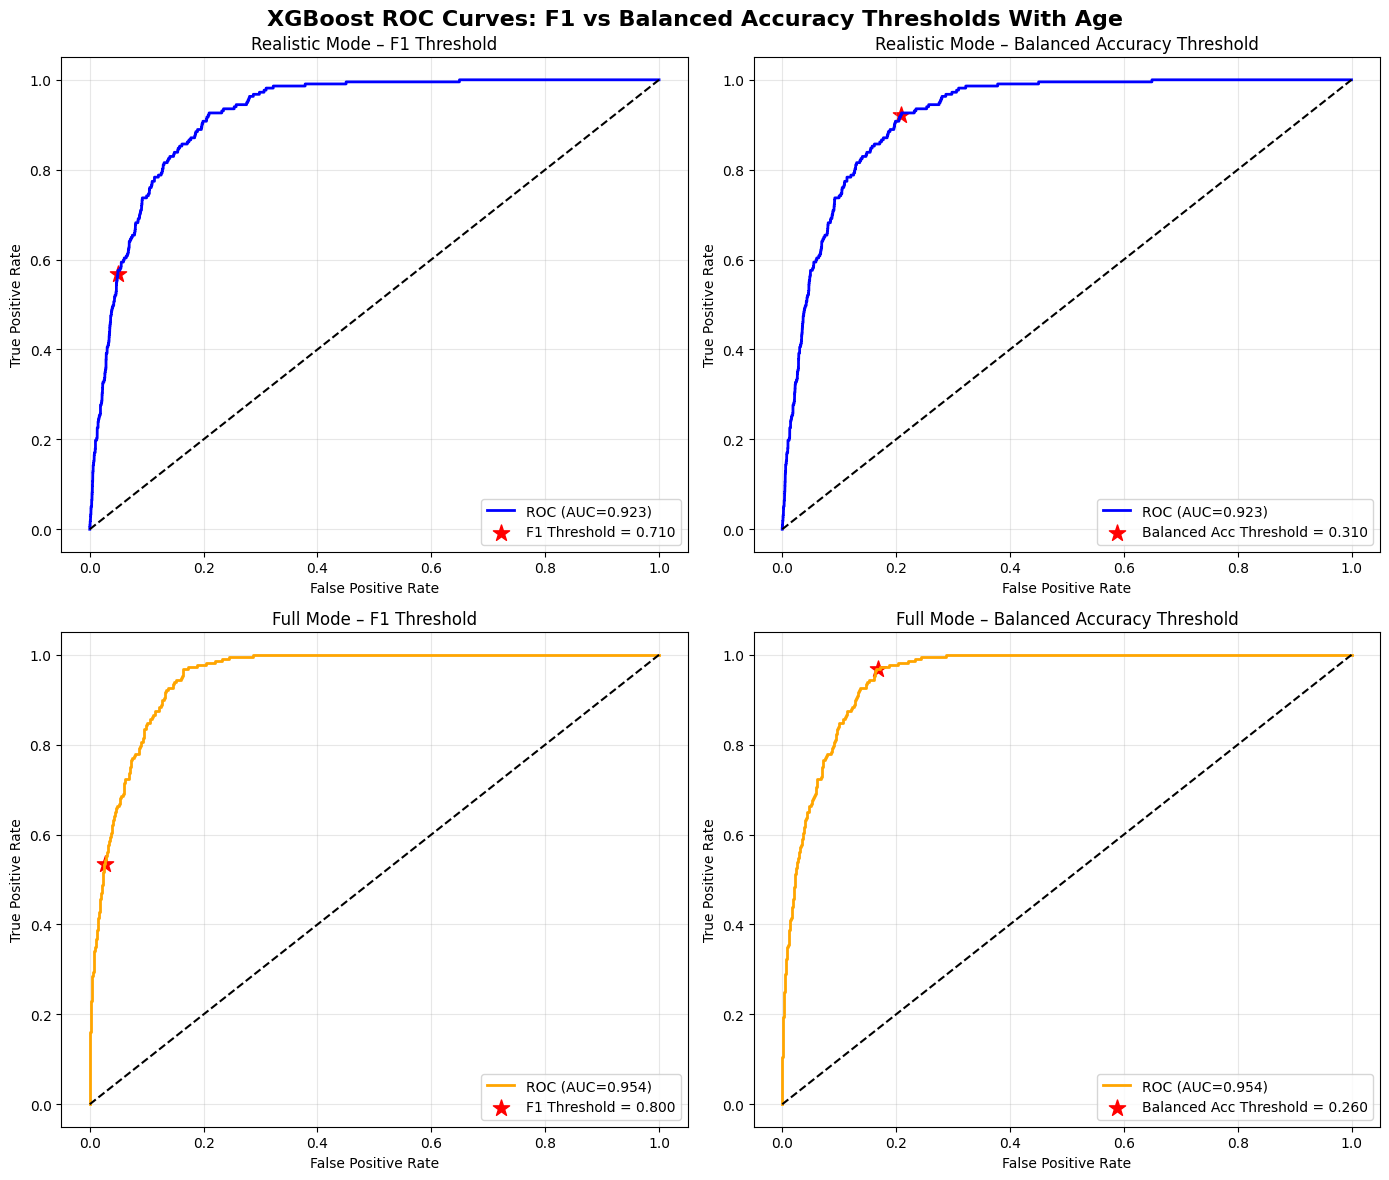

In [24]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# Helper to compute a ROC point at a chosen threshold
# ----------------------------------------------------------------------
def roc_point(y_true, y_pred_prop, threshold):
    y_pred = (y_pred_prop >= threshold).astype(int)

    # Safe confusion matrix extraction
    try:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    except ValueError:
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = (cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1])

    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return fpr, tpr


# ----------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('XGBoost ROC Curves: F1 vs Balanced Accuracy Thresholds With Age',
             fontsize=16, fontweight='bold')

# ======================================================================
# REALISTIC MODE ROC
# ======================================================================
fpr_real, tpr_real, _ = roc_curve(y_test_R, y_prob_R)
roc_auc_real = auc(fpr_real, tpr_real)

# F1 threshold point
thr_R_F1 = xgb_realistic["thresholds"]["F1"]
fpr_f1_real, tpr_f1_real = roc_point(y_test_R, y_prob_R, thr_R_F1)

axes[0, 0].plot(fpr_real, tpr_real, 'b-', linewidth=2,
                label=f'ROC (AUC={roc_auc_real:.3f})')
axes[0, 0].plot([0, 1], [0, 1], 'k--')
axes[0, 0].scatter(fpr_f1_real, tpr_f1_real, color='red', s=150, marker='*',
                   label=f'F1 Threshold = {thr_R_F1:.3f}')
axes[0, 0].set_title('Realistic Mode – F1 Threshold')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Balanced Accuracy threshold
thr_R_BAL = xgb_realistic["thresholds"]["Balanced_Accuracy"]
fpr_bal_real, tpr_bal_real = roc_point(y_test_R, y_prob_R, thr_R_BAL)

axes[0, 1].plot(fpr_real, tpr_real, 'b-', linewidth=2,
                label=f'ROC (AUC={roc_auc_real:.3f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--')
axes[0, 1].scatter(fpr_bal_real, tpr_bal_real, color='red', s=150, marker='*',
                   label=f'Balanced Acc Threshold = {thr_R_BAL:.3f}')
axes[0, 1].set_title('Realistic Mode – Balanced Accuracy Threshold')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


# ======================================================================
# FULL MODE ROC
# ======================================================================
fpr_full, tpr_full, _ = roc_curve(y_test_F, y_prob_F)
roc_auc_full = auc(fpr_full, tpr_full)

# F1 threshold point
thr_F_F1 = xgb_full["thresholds"]["F1"]
fpr_f1_full, tpr_f1_full = roc_point(y_test_F, y_prob_F, thr_F_F1)

axes[1, 0].plot(fpr_full, tpr_full, 'orange', linewidth=2,
                label=f'ROC (AUC={roc_auc_full:.3f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--')
axes[1, 0].scatter(fpr_f1_full, tpr_f1_full, color='red', s=150, marker='*',
                   label=f'F1 Threshold = {thr_F_F1:.3f}')
axes[1, 0].set_title('Full Mode – F1 Threshold')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Balanced Accuracy threshold
thr_F_BAL = xgb_full["thresholds"]["Balanced_Accuracy"]
fpr_bal_full, tpr_bal_full = roc_point(y_test_F, y_prob_F, thr_F_BAL)

axes[1, 1].plot(fpr_full, tpr_full, 'orange', linewidth=2,
                label=f'ROC (AUC={roc_auc_full:.3f})')
axes[1, 1].plot([0, 1], [0, 1], 'k--')
axes[1, 1].scatter(fpr_bal_full, tpr_bal_full, color='red', s=150, marker='*',
                   label=f'Balanced Acc Threshold = {thr_F_BAL:.3f}')
axes[1, 1].set_title('Full Mode – Balanced Accuracy Threshold')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("xgboost_roc_2x2_grid.png", dpi=300, bbox_inches='tight')
plt.show()

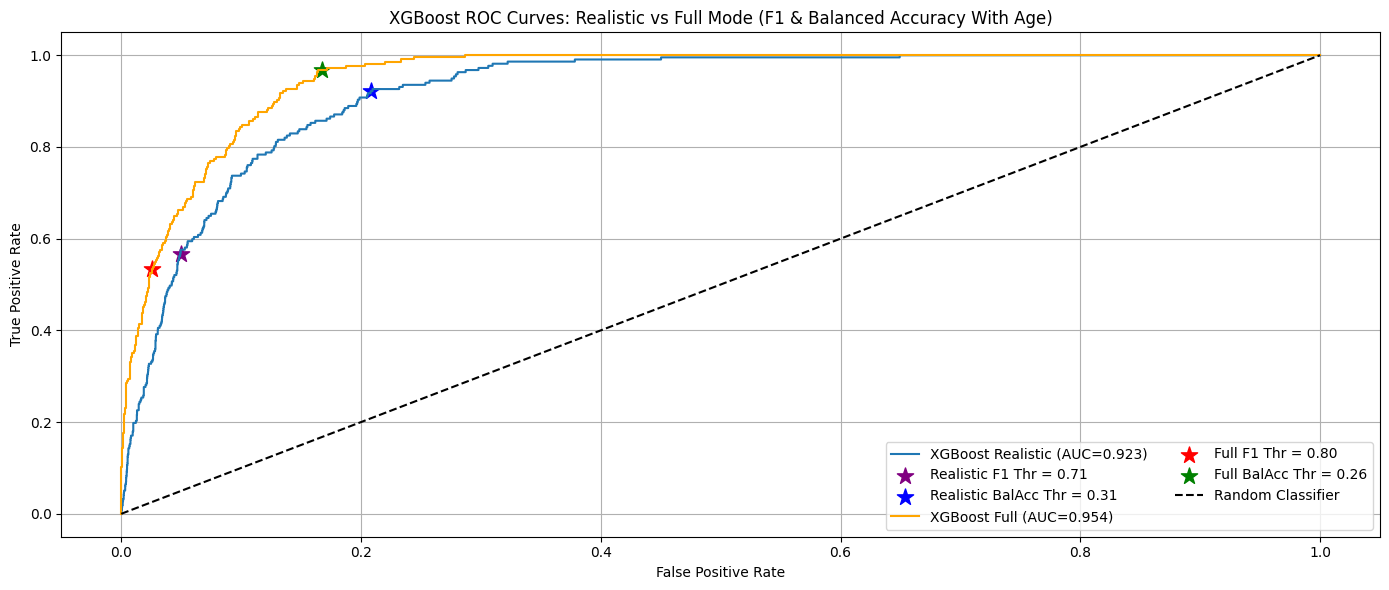

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# Helper to compute ROC point at a threshold
# ----------------------------------------------------------------------
def roc_point(y_true, y_pred_prop, threshold):
    y_pred = (y_pred_prop >= threshold).astype(int)

    try:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    except ValueError:
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = (cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1])

    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return fpr, tpr


# ----------------------------------------------------------------------
# COMPUTE ROC CURVES USING CORRECT VARIABLES
# ----------------------------------------------------------------------
fpr_real, tpr_real, _ = roc_curve(y_test_R, y_prob_R)
fpr_full, tpr_full, _ = roc_curve(y_test_F, y_prob_F)

roc_auc_real = auc(fpr_real, tpr_real)
roc_auc_full = auc(fpr_full, tpr_full)

# ----------------------------------------------------------------------
# THRESHOLD POINTS
# ----------------------------------------------------------------------
thr_R_F1  = xgb_realistic["thresholds"]["F1"]
thr_R_BAL = xgb_realistic["thresholds"]["Balanced_Accuracy"]

thr_F_F1  = xgb_full["thresholds"]["F1"]
thr_F_BAL = xgb_full["thresholds"]["Balanced_Accuracy"]

# Realistic Mode Points
fpr_f1_real,  tpr_f1_real  = roc_point(y_test_R, y_prob_R, thr_R_F1)
fpr_bal_real, tpr_bal_real = roc_point(y_test_R, y_prob_R, thr_R_BAL)

# Full Mode Points
fpr_f1_full,  tpr_f1_full  = roc_point(y_test_F, y_prob_F, thr_F_F1)
fpr_bal_full, tpr_bal_full = roc_point(y_test_F, y_prob_F, thr_F_BAL)

# ----------------------------------------------------------------------
# PLOT COMBINED ROC
# ----------------------------------------------------------------------
plt.figure(figsize=(14, 6))

# Realistic Mode ROC
plt.plot(
    fpr_real, tpr_real,
    label=f"XGBoost Realistic (AUC={roc_auc_real:.3f})",
    linestyle='-'
)
plt.scatter(fpr_f1_real, tpr_f1_real, color='purple', marker='*', s=150,
            label=f"Realistic F1 Thr = {thr_R_F1:.2f}")
plt.scatter(fpr_bal_real, tpr_bal_real, color='blue', marker='*', s=150,
            label=f"Realistic BalAcc Thr = {thr_R_BAL:.2f}")

# Full Mode ROC
plt.plot(
    fpr_full, tpr_full,
    color='orange',
    label=f"XGBoost Full (AUC={roc_auc_full:.3f})",
    linestyle='-'
)
plt.scatter(fpr_f1_full, tpr_f1_full, color='red', marker='*', s=150,
            label=f"Full F1 Thr = {thr_F_F1:.2f}")
plt.scatter(fpr_bal_full, tpr_bal_full, color='green', marker='*', s=150,
            label=f"Full BalAcc Thr = {thr_F_BAL:.2f}")

# Random Classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curves: Realistic vs Full Mode (F1 & Balanced Accuracy With Age)")
plt.legend(ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_roc_combined.png", dpi=300)
plt.show()


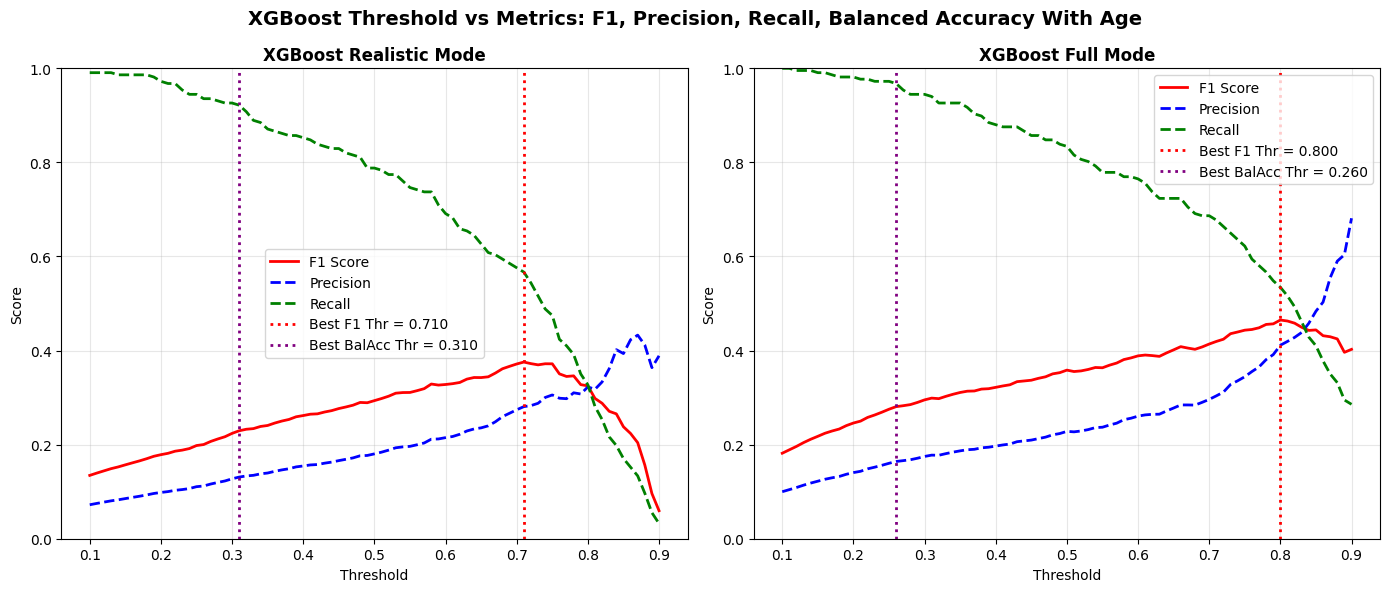

In [26]:
from sklearn.metrics import f1_score, balanced_accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Define threshold range
threshold_range = np.arange(0.1, 0.91, 0.01)

def compute_metrics(y_true, y_pred_prop, threshold_range):
    f1_scores, bal_acc_scores, precision_scores, recall_scores = [], [], [], []
    for t in threshold_range:
        y_pred_t = (y_pred_prop >= t).astype(int)
        f1_scores.append(f1_score(y_true, y_pred_t, zero_division=0))
        bal_acc_scores.append(balanced_accuracy_score(y_true, y_pred_t))
        precision_scores.append(precision_score(y_true, y_pred_t, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred_t, zero_division=0))
    return f1_scores, bal_acc_scores, precision_scores, recall_scores


# ======================================================================
# REALISTIC MODE (correct variables)
# ======================================================================
f1_real, bal_real, prec_real, rec_real = compute_metrics(
    y_test_R, y_prob_R, threshold_range
)

# ======================================================================
# FULL MODE (correct variables)
# ======================================================================
f1_full, bal_full, prec_full, rec_full = compute_metrics(
    y_test_F, y_prob_F, threshold_range
)


# ======================================================================
# PLOT
# ======================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('XGBoost Threshold vs Metrics: F1, Precision, Recall, Balanced Accuracy With Age',
             fontsize=14, fontweight='bold')


# ---------------------------------------------------------
# REALISTIC MODE
# ---------------------------------------------------------
axes[0].plot(threshold_range, f1_real, 'r-', linewidth=2, label='F1 Score')
axes[0].plot(threshold_range, prec_real, 'b--', linewidth=2, label='Precision')
axes[0].plot(threshold_range, rec_real, 'g--', linewidth=2, label='Recall')

# Vertical threshold lines
axes[0].axvline(xgb_realistic["thresholds"]["F1"], color='red', linestyle=':', linewidth=2,
                label=f'Best F1 Thr = {xgb_realistic["thresholds"]["F1"]:.3f}')
axes[0].axvline(xgb_realistic["thresholds"]["Balanced_Accuracy"], color='purple', linestyle=':', linewidth=2,
                label=f'Best BalAcc Thr = {xgb_realistic["thresholds"]["Balanced_Accuracy"]:.3f}')

axes[0].set_title('XGBoost Realistic Mode', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Score')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='best')


# ---------------------------------------------------------
# FULL MODE
# ---------------------------------------------------------
axes[1].plot(threshold_range, f1_full, 'r-', linewidth=2, label='F1 Score')
axes[1].plot(threshold_range, prec_full, 'b--', linewidth=2, label='Precision')
axes[1].plot(threshold_range, rec_full, 'g--', linewidth=2, label='Recall')

# Vertical threshold lines
axes[1].axvline(xgb_full["thresholds"]["F1"], color='red', linestyle=':', linewidth=2,
                label=f'Best F1 Thr = {xgb_full["thresholds"]["F1"]:.3f}')
axes[1].axvline(xgb_full["thresholds"]["Balanced_Accuracy"], color='purple', linestyle=':', linewidth=2,
                label=f'Best BalAcc Thr = {xgb_full["thresholds"]["Balanced_Accuracy"]:.3f}')

axes[1].set_title('XGBoost Full Mode', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Score')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='best')


plt.tight_layout()
plt.savefig("xgboost_threshold_vs_metrics_pair_combined.png", dpi=300, bbox_inches='tight')
plt.show()
